In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle as pkl
import pickle5 as pkl5
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
import mdtraj as md
from scipy.spatial.distance import jensenshannon 

import sys
blocking_dir='/projects/prism/people/hzr104/software/BLOCKING_OLD/MonoCV'
sys.path.append(blocking_dir)
import block as block

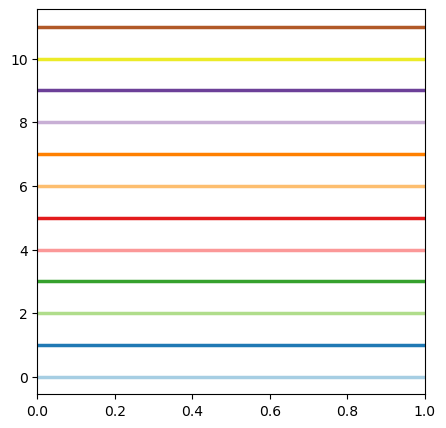

In [2]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

new_cmap = ['#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#ECEC28','#B15928']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors_IDPs = rtg_r(np.linspace(0,1,12))

#Test colormap
fig = plt.figure(figsize=(5,5))

for i in range(len(colors_IDPs)):
    plt.axhline(i, color=colors_IDPs[i], linewidth=2.5)

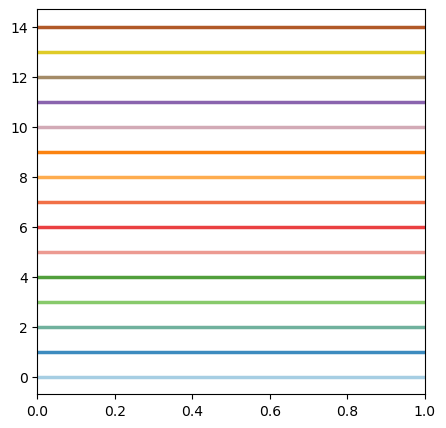

In [3]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

new_cmap = ['#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#ECEC28','#B15928']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors_multidomain = rtg_r(np.linspace(0,1,15))

#Test colormap
fig = plt.figure(figsize=(5,5))

for i in range(len(colors_multidomain)):
    plt.axhline(i, color=colors_multidomain[i], linewidth=2.5)

In [10]:
lambda_PP = '0.88'
lambda_PW = '1.10'
lambda_PWBB = '1.22'
errmethod = 'hline'
data_dir='/projects/prism/people/hzr104/binf_for_ERDA/Tors_stuff'

In [5]:
IDPs = ['K25', 'A1', 'CoRNID', 'ColNT', 'FhuA', 'Hst52', 'K19', 'PNt', 'Sic1', 'aSyn', 'Hst5', 'ACTR']
exp_Rg_IDPs = {'PNt': [4.96, 0.56], 
               'Sic1': [2.86, 0.14], 
               'Hst5':[1.34, 0.05], 
               'ACTR':[2.55, 0.27], 
               'K25': [4.06, 0.28], 
               'A1': [2.55, 0.1], 
               'CoRNID': [4.72, 0.12], 
               'ColNT':[2.82, 0.034], 
               'FhuA':[3.21, 0.22], 
               'Hst52':[1.77, 0.049], 
               'K19':[3.35, 0.29], 
               'aSyn':[3.56, 0.036]
              }

IDPs_plotnames = {'K25':'Tau$_{K25}$', 
                  'A1':'hnRNPA1$_{LCD}$', 
                  'CoRNID':'CoR$_{NID}$', 
                  'ColNT':'ColN$_{T}$', 
                  'FhuA':'FhuA', 
                  'Hst52':'Hst5$_2$', 
                  'K19':'Tau$_{K19}$', 
                  'PNt':'PRN$_{Nt}$', 
                  'Sic1':'Sic1', 
                  'aSyn':'αSyn', 
                  'Hst5':'Hst5', 
                  'ACTR':'ACTR$_{AD}$'
}

multidomain_alt = ['TIA1', 'hnRNPA1', 'hSUMO_hnRNPA1', 'THB_C2', 'Gal-3', 'mTurq_GS0_mNeon', 'mTurq_GS8_mNeon', 'mTurq_GS16_mNeon', 'mTurq_GS24_mNeon', 'mTurq_GS32_mNeon', 'mTurq_GS48_mNeon', 'Ubq2', 'Ubq3', 'Ubq4', 'C5_C6_C7']
multidomain = ['TIA1', 'FL-A1', 'hSUMO-FL-A1', 'THB-C2', 'Gal3', 'GS0', 'GS8', 'GS16', 'GS24', 'GS32', 'GS48', 'Ubq2', 'Ubq3', 'Ubq4', 'C5-C6-C7']

exp_Rg_multidomain = {'GS0':[3.2, 0.044], 
                      'GS8':[3.37, 0.036],
                      'GS16':[3.45, 0.06],
                      'GS24':[3.57, 0.075],
                      'GS32':[3.75, 0.097],
                      'GS48':[4.11, 0.21],
                      'Ubq2':[2.19, 0.18],
                      'Ubq3':[2.62, 0.018],
                      'Ubq4':[3.19, 0.092],
                      'C5-C6-C7':[3.75, 0.075],
                      'TIA1':[2.75, 0.05],
                      'FL-A1':[3.12, 0.078],
                      'hSUMO-FL-A1':[3.37, 0.13],
                      'THB-C2':[1.91, 0.076],
                      'Gal3':[2.91, 0.06]
                     }

multidomain_alt_plotnames = {'TIA1':'TIA1', 
                         'hnRNPA1':'hnRNPA1', 
                         'hSUMO_hnRNPA1':'hisSUMO-hnRNPA1', 
                         'THB_C2':'MyBP-C$_{MTHB-C2}$', 
                         'Gal-3':'Gal-3', 
                         'mTurq_GS0_mNeon':'mTurq-mNeon', 
                         'mTurq_GS8_mNeon':'mTurq-GS$_8$-mNeon', 
                         'mTurq_GS16_mNeon':'mTurq-GS$_{16}$-mNeon', 
                         'mTurq_GS24_mNeon':'mTurq-GS$_{24}$-mNeon', 
                         'mTurq_GS32_mNeon':'mTurq-GS$_{32}$-mNeon', 
                         'mTurq_GS48_mNeon':'mTurq-GS$_{48}$-mNeon', 
                         'Ubq2':'Ubq$_2$', 
                         'Ubq3':'Ubq$_3$', 
                         'Ubq4':'Ubq$_4$', 
                         'C5_C6_C7':'MyBP-C$_{C5-C6-C7}$'
}

multidomain_plotnames = {'TIA1':'TIA1', 
                         'FL-A1':'hnRNPA1', 
                         'hSUMO-FL-A1':'hisSUMO-hnRNPA1', 
                         'THB-C2':'MyBP-C$_{MTHB-C2}$', 
                         'Gal3':'Gal-3', 
                         'GS0':'mTurq-mNeon', 
                         'GS8':'mTurq-GS$_8$-mNeon', 
                         'GS16':'mTurq-GS$_{16}$-mNeon', 
                         'GS24':'mTurq-GS$_{24}$-mNeon', 
                         'GS32':'mTurq-GS$_{32}$-mNeon', 
                         'GS48':'mTurq-GS$_{48}$-mNeon', 
                         'Ubq2':'Ubq$_2$', 
                         'Ubq3':'Ubq$_3$', 
                         'Ubq4':'Ubq$_4$', 
                         'C5-C6-C7':'MyBP-C$_{C5-C6-C7}$'
}

In [6]:
def load_pickle(filename):
    with open(filename, 'rb') as f:
        loaded_obj = pkl.load(f)
        
    return loaded_obj

def load_pickle5(filename):
    with open(filename, 'rb') as f:
        loaded_obj = pkl5.load(f)
        
    return loaded_obj

def pearsonoutput(x,y):
    return stats.pearsonr(x,y)[0]

def spearmanoutput(x,y):
    return stats.spearmanr(x,y)[0]

# Rg IDPs

## Rg distributions all force fields

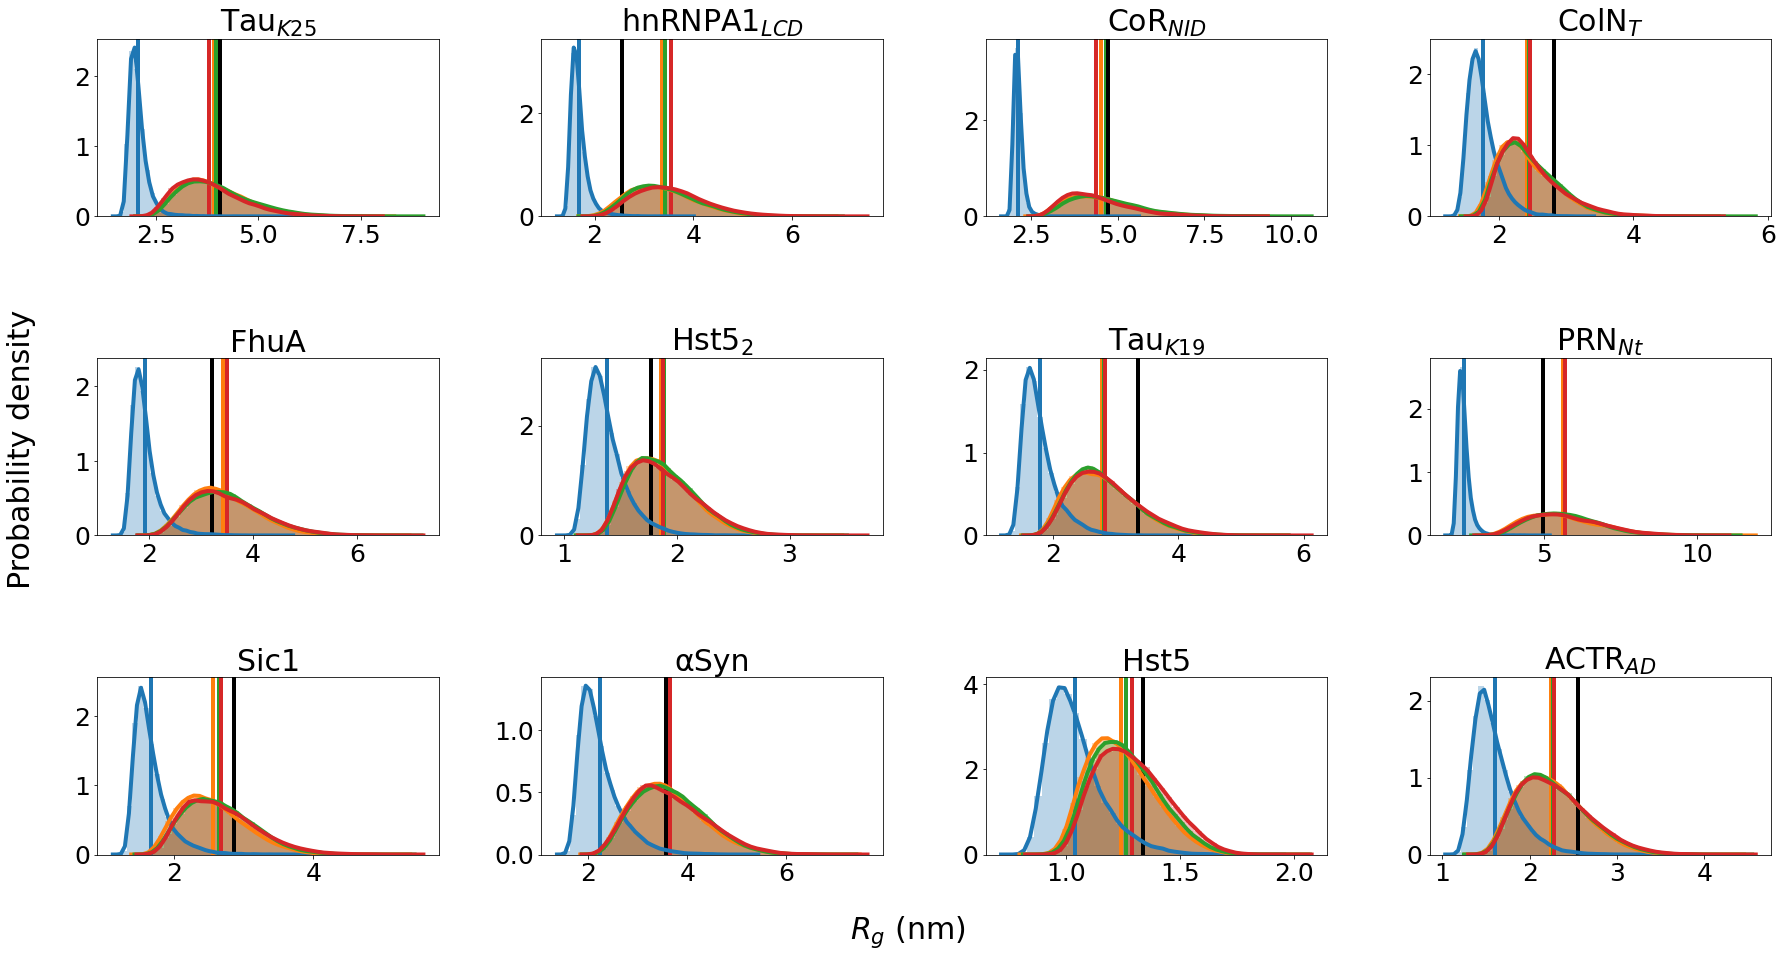

In [53]:
colors_pltdefault = plt.rcParams['axes.prop_cycle'].by_key()['color']

l_un = '1.00'
l_PP = '0.88'
l_PW = '1.10'
l_PW_BB = '1.22'

#Start plot
fig, ax = plt.subplots(figsize=(30,15), nrows=3, ncols=4)    
plt.subplots_adjust(hspace = 0.8, wspace=0.3)
fig.text(0.5, 0.07, '$R_g$ (nm)', ha='center', va='top', fontsize=30)
fig.text(0.09, 0.5, 'Probability density', ha='center', va='center', fontsize=30, rotation=90)

k=0
n=0
#Rg distributions
for protein in IDPs:
    Rg_un = np.genfromtxt(f'{data_dir}/IDPs/PP/{protein}/lambda_{l_un}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
    Rg_PP = np.genfromtxt(f'{data_dir}/IDPs/PP/{protein}/lambda_{l_PP}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
    Rg_PW = np.genfromtxt(f'{data_dir}/IDPs/PW/{protein}/lambda_{l_PW}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
    Rg_PW_BB = np.genfromtxt(f'{data_dir}/IDPs/PW_BB/{protein}/lambda_{l_PW_BB}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_un_avg = np.average(Rg_un)
    Rg_PP_avg = np.average(Rg_PP)
    Rg_PW_avg = np.average(Rg_PW)
    Rg_PW_BB_avg = np.average(Rg_PW_BB)
    
    Rg_exp = exp_Rg_IDPs[protein][0]
    Rg_experr = exp_Rg_IDPs[protein][1]
    
    #Plot title
    ax[k,n].set_title(f'{IDPs_plotnames[protein]}', fontsize=30)
    
    #KDE
    kde_x_un = np.linspace( np.amin(Rg_un)*0.9, np.amax(Rg_un)*1.1, num = 50 )
    kde_y_un = stats.gaussian_kde(Rg_un, bw_method = "silverman").evaluate(kde_x_un)   

    kde_x_PP = np.linspace( np.amin(Rg_PP)*0.9, np.amax(Rg_PP)*1.1, num = 50 )
    kde_y_PP = stats.gaussian_kde(Rg_PP, bw_method = "silverman").evaluate(kde_x_PP)
    
    kde_x_PW = np.linspace( np.amin(Rg_PW)*0.9, np.amax(Rg_PW)*1.1, num = 50 )
    kde_y_PW = stats.gaussian_kde(Rg_PW, bw_method = "silverman").evaluate(kde_x_PW)  
    
    kde_x_PW_BB = np.linspace( np.amin(Rg_PW_BB)*0.9, np.amax(Rg_PW_BB)*1.1, num = 50 )
    kde_y_PW_BB = stats.gaussian_kde(Rg_PW_BB, bw_method = "silverman").evaluate(kde_x_PW_BB) 
    
    #Plot
    ax[k,n].hist(Rg_un, density=True, color=colors_pltdefault[0], alpha=0.3, bins=30)
    ax[k,n].hist(Rg_PP, density=True, color=colors_pltdefault[1], alpha=0.3, bins=30)
    ax[k,n].hist(Rg_PW, density=True, color=colors_pltdefault[2], alpha=0.3, bins=30)
    ax[k,n].hist(Rg_PW_BB, density=True, color=colors_pltdefault[3], alpha=0.3, bins=30)

    if k==0 and n==0:
        ax[k,n].axvline(np.average(Rg_un_avg),linewidth=4, alpha=1, color=colors_pltdefault[0], label='Unmodified')
        ax[k,n].axvline(np.average(Rg_PP_avg),linewidth=4, alpha=1, color=colors_pltdefault[1], label=f'$λ_{{PP}}$={l_PP}')
        ax[k,n].axvline(np.average(Rg_PW_avg),linewidth=4, alpha=1, color=colors_pltdefault[2], label=f'$λ_{{PW}}$={l_PW}')
        ax[k,n].axvline(np.average(Rg_PW_BB_avg),linewidth=4, alpha=1, color=colors_pltdefault[3], label=f'$λ_{{PW}}$={l_PW}')
        ax[k,n].axvline(np.average(Rg_exp),linewidth=4, alpha=1, color='black', label='Experimental')

    else:
        ax[k,n].axvline(np.average(Rg_un_avg),linewidth=4, alpha=1, color=colors_pltdefault[0])
        ax[k,n].axvline(np.average(Rg_PP_avg),linewidth=4, alpha=1, color=colors_pltdefault[1])
        ax[k,n].axvline(np.average(Rg_PW_avg),linewidth=4, alpha=1, color=colors_pltdefault[2])
        ax[k,n].axvline(np.average(Rg_PW_BB_avg),linewidth=4, alpha=1, color=colors_pltdefault[3])
        ax[k,n].axvline(np.average(Rg_exp),linewidth=4, alpha=1, color='black')

    #Plot
    ax[k,n].plot(kde_x_un, kde_y_un, '-', linewidth=4, color=colors_pltdefault[0])
    ax[k,n].plot(kde_x_PP, kde_y_PP, '-', linewidth=4, color=colors_pltdefault[1])
    ax[k,n].plot(kde_x_PW, kde_y_PW, '-', linewidth=4, color=colors_pltdefault[2])
    ax[k,n].plot(kde_x_PW_BB, kde_y_PW_BB, '-', linewidth=4, color=colors_pltdefault[3])

    ax[k,n].tick_params(axis='both', which='major', labelsize=25)
    
    #Iterate over plot panel indeces
    n+=1
    if n==4:
        n=0
        k+=1
        
fig.savefig(f'figures/Rg_distributions_IDPs.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_dsitributions_IDPs.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Unmodified Martini3

<>:41: SyntaxWarning: invalid escape sequence '\i'
<>:42: SyntaxWarning: invalid escape sequence '\i'
<>:41: SyntaxWarning: invalid escape sequence '\i'
<>:42: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_3952114/502093805.py:41: SyntaxWarning: invalid escape sequence '\i'
  plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
/tmp/ipykernel_3952114/502093805.py:42: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
/projects/prism/people/hzr104/software/BLOCKING_OLD/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in scalar divide
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


0.6248886755714641


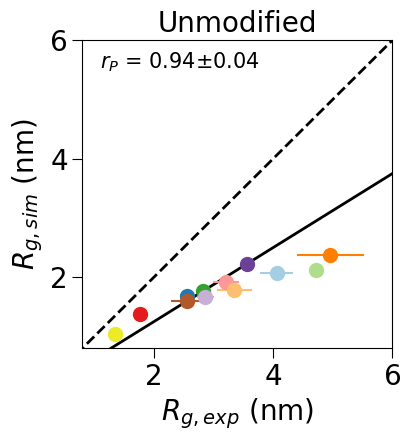

In [13]:
l = '1.00'

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in IDPs:
    Rg = np.genfromtxt(f'{data_dir}/IDPs/PP/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_IDPs[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_IDPs[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Plot
fig= plt.figure(figsize=(4,4))

plt.title('Unmodified', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

axis_max = 6.0
axis_min = 0.8
#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein, Rg_sim_vs_protein)
bootstrap_result = stats.bootstrap((Rg_exp_vs_protein,Rg_sim_vs_protein), pearsonoutput, vectorized=False, paired=True)    
pearson_err = bootstrap_result.standard_error
plt.text(0.17, 0.81, f'$r_{{P}}$ = {pearson:.2f}±{pearson_err:.2f}', fontsize=15, transform=fig.transFigure)

#Plot data points
for i,protein in enumerate(IDPs):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_IDPs[i], markersize=10)

fig.savefig('figures/Rg_IDPs_unmodified.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig('figures/Rg_IDPs_unmodified.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


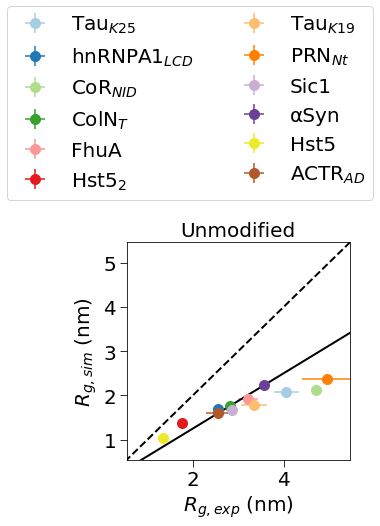

In [8]:
#Plot
fig= plt.figure(figsize=(4,4))

plt.title('Unmodified', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(IDPs):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_IDPs[i], markersize=10, label=IDPs_plotnames[protein])

#plt.legend(fontsize=20, ncol=int(len(IDPs)/2), bbox_to_anchor=(1.15, 1.15))
plt.legend(fontsize=20, ncol=2, bbox_to_anchor=(1.15, 1.15))

fig.savefig('figures/IDPs_legend.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig('figures/IDPs_legend.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water

<>:42: SyntaxWarning: invalid escape sequence '\i'
<>:43: SyntaxWarning: invalid escape sequence '\i'
<>:42: SyntaxWarning: invalid escape sequence '\i'
<>:43: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_3952114/2350161063.py:42: SyntaxWarning: invalid escape sequence '\i'
  plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
/tmp/ipykernel_3952114/2350161063.py:43: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
/projects/prism/people/hzr104/software/BLOCKING_OLD/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in scalar divide
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


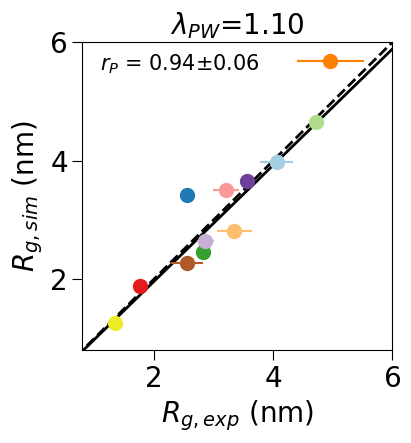

In [15]:
Rg_dir = f'{data_dir}/IDPs/PW'

l = lambda_PW

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in IDPs:

    Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_IDPs[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_IDPs[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PW}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
axis_max = 6.0
axis_min = 0.8
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein, Rg_sim_vs_protein)
bootstrap_result = stats.bootstrap((Rg_exp_vs_protein,Rg_sim_vs_protein), pearsonoutput, vectorized=False, paired=True)    
pearson_err = bootstrap_result.standard_error
plt.text(0.17, 0.81, f'$r_{{P}}$ = {pearson:.2f}±{pearson_err:.2f}', fontsize=15, transform=fig.transFigure)

#Plot data points
for i,protein in enumerate(IDPs):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_IDPs[i], markersize=10)

fig.savefig(f'figures/Rg_IDPs_PW_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_IDPs_PW_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-protein

<>:42: SyntaxWarning: invalid escape sequence '\i'
<>:43: SyntaxWarning: invalid escape sequence '\i'
<>:42: SyntaxWarning: invalid escape sequence '\i'
<>:43: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_3952114/3502834672.py:42: SyntaxWarning: invalid escape sequence '\i'
  plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
/tmp/ipykernel_3952114/3502834672.py:43: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
/projects/prism/people/hzr104/software/BLOCKING_OLD/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in scalar divide
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


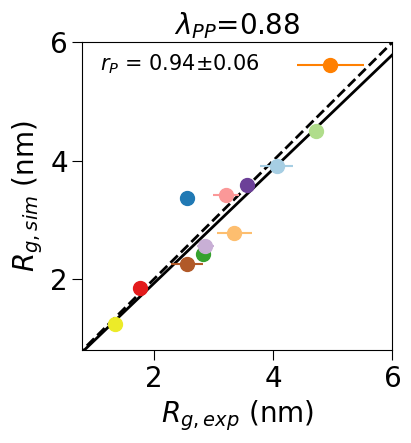

In [16]:
Rg_dir = f'{data_dir}/IDPs/PP'

l = lambda_PP

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in IDPs:

    Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_IDPs[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_IDPs[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PP}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
axis_max = 6.0
axis_min = 0.8
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein, Rg_sim_vs_protein)
bootstrap_result = stats.bootstrap((Rg_exp_vs_protein,Rg_sim_vs_protein), pearsonoutput, vectorized=False, paired=True)    
pearson_err = bootstrap_result.standard_error
plt.text(0.17, 0.81, f'$r_{{P}}$ = {pearson:.2f}±{pearson_err:.2f}', fontsize=15, transform=fig.transFigure)

#Plot data points
for i,protein in enumerate(IDPs):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_IDPs[i], markersize=10)

fig.savefig(f'figures/Rg_IDPs_PP_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_IDPs_PP_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water backbone

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


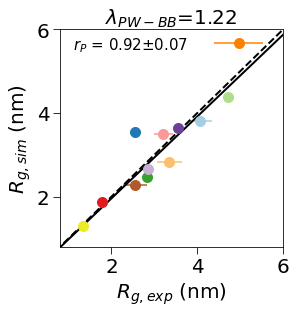

In [104]:
Rg_dir = f'{data_dir}/IDPs/PW_BB'

l = lambda_PWBB

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in IDPs:

    if l == '1.00':
        Rg = np.genfromtxt(f'{data_dir}/IDPs/PP/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
    else:
        Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_IDPs[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_IDPs[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PW-BB}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
axis_max = 6.0
axis_min = 0.8
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein, Rg_sim_vs_protein)
bootstrap_result = stats.bootstrap((Rg_exp_vs_protein,Rg_sim_vs_protein), pearsonoutput, vectorized=False, paired=True)    
pearson_err = bootstrap_result.standard_error
plt.text(0.17, 0.81, f'$r_{{P}}$ = {pearson:.2f}±{pearson_err:.2f}', fontsize=15, transform=fig.transFigure)

#Plot data points
for i,protein in enumerate(IDPs):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_IDPs[i], markersize=10)

fig.savefig(f'figures/Rg_IDPs_PWBB_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_IDPs_PWBB_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

# Rg multidomain

## Rg distributions all force fields

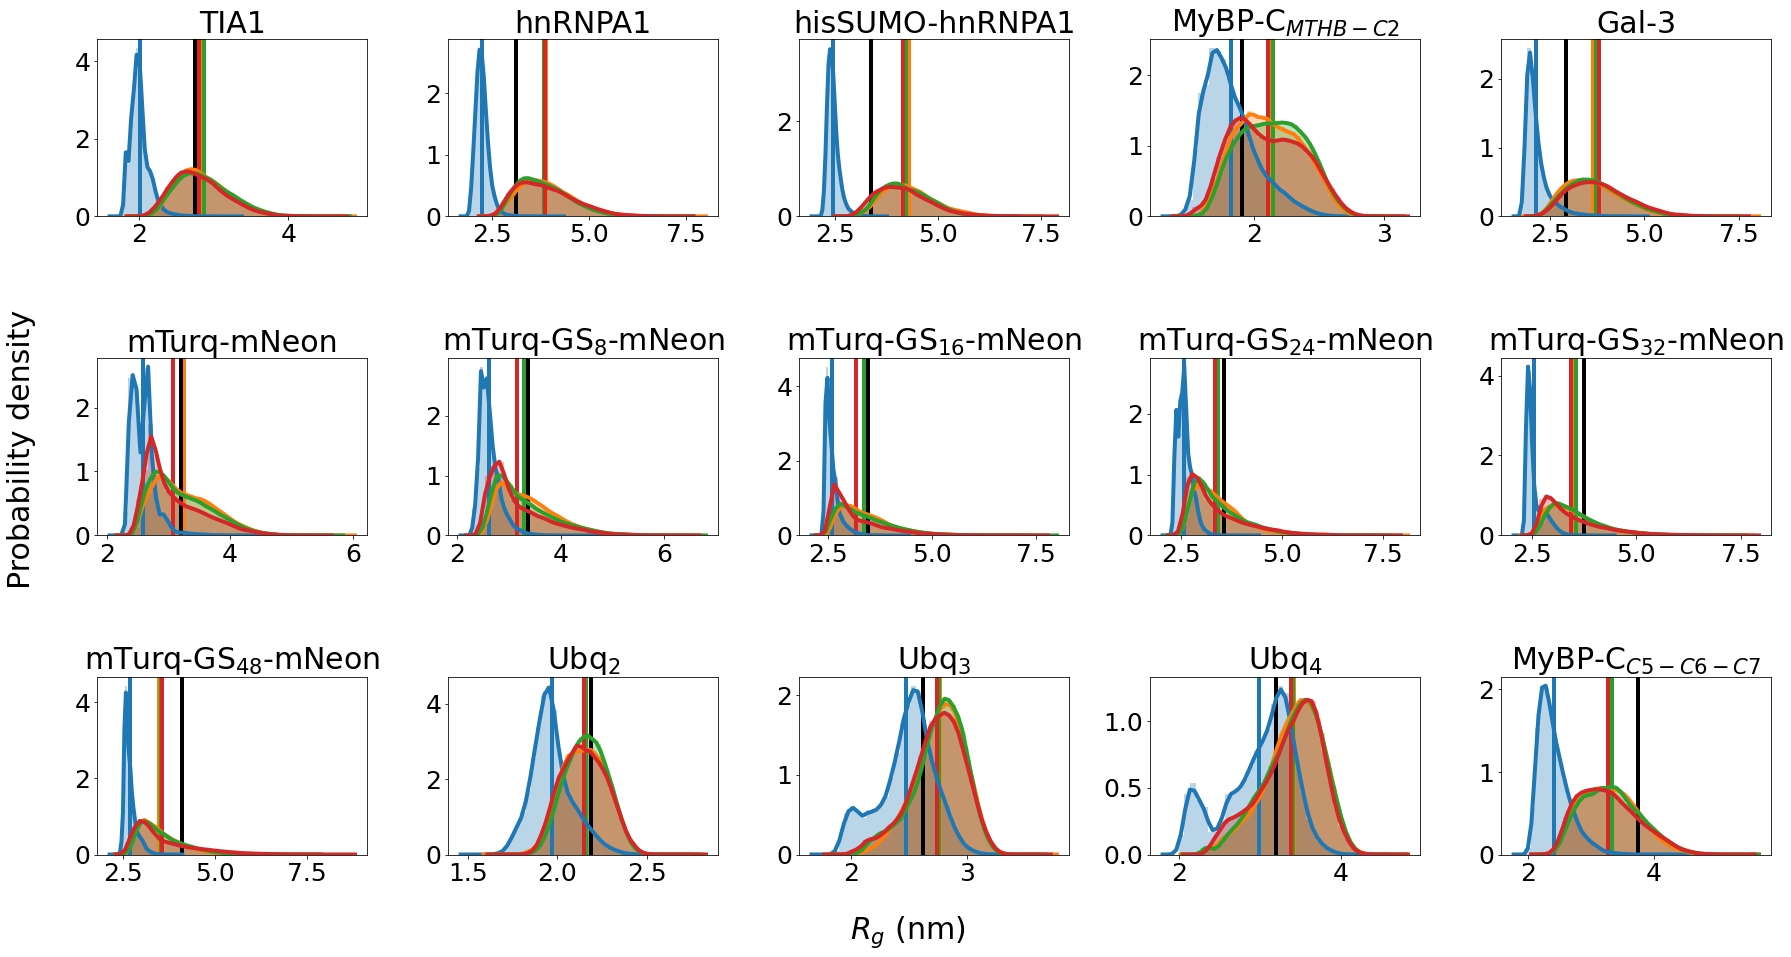

In [52]:
colors_pltdefault = plt.rcParams['axes.prop_cycle'].by_key()['color']

l_un = '1.00'
l_PP = '0.88'
l_PW = '1.10'
l_PW_BB = '1.22'

#Start plot
fig, ax = plt.subplots(figsize=(30,15), nrows=3, ncols=5)    
plt.subplots_adjust(hspace = 0.8, wspace=0.3)
fig.text(0.5, 0.07, '$R_g$ (nm)', ha='center', va='top', fontsize=30)
fig.text(0.09, 0.5, 'Probability density', ha='center', va='center', fontsize=30, rotation=90)

k=0
n=0
#Rg distributions
for protein in multidomain:
    Rg_un = np.genfromtxt(f'{data_dir}/MPs/PP/{protein}/lambda_{l_un}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
    Rg_PP = np.genfromtxt(f'{data_dir}/MPs/PP/{protein}/lambda_{l_PP}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
    Rg_PW = np.genfromtxt(f'{data_dir}/MPs/PW/{protein}/lambda_{l_PW}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
    Rg_PW_BB = np.genfromtxt(f'{data_dir}/MPs/PW_BB/{protein}/lambda_{l_PW_BB}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_un_avg = np.average(Rg_un)
    Rg_PP_avg = np.average(Rg_PP)
    Rg_PW_avg = np.average(Rg_PW)
    Rg_PW_BB_avg = np.average(Rg_PW_BB)
    
    Rg_exp = exp_Rg_multidomain[protein][0]
    Rg_experr = exp_Rg_multidomain[protein][1]
    
    #Plot title
    ax[k,n].set_title(f'{multidomain_plotnames[protein]}', fontsize=30)
    
    #KDE
    kde_x_un = np.linspace( np.amin(Rg_un)*0.9, np.amax(Rg_un)*1.1, num = 50 )
    kde_y_un = stats.gaussian_kde(Rg_un, bw_method = "silverman").evaluate(kde_x_un)   

    kde_x_PP = np.linspace( np.amin(Rg_PP)*0.9, np.amax(Rg_PP)*1.1, num = 50 )
    kde_y_PP = stats.gaussian_kde(Rg_PP, bw_method = "silverman").evaluate(kde_x_PP)
    
    kde_x_PW = np.linspace( np.amin(Rg_PW)*0.9, np.amax(Rg_PW)*1.1, num = 50 )
    kde_y_PW = stats.gaussian_kde(Rg_PW, bw_method = "silverman").evaluate(kde_x_PW)  
    
    kde_x_PW_BB = np.linspace( np.amin(Rg_PW_BB)*0.9, np.amax(Rg_PW_BB)*1.1, num = 50 )
    kde_y_PW_BB = stats.gaussian_kde(Rg_PW_BB, bw_method = "silverman").evaluate(kde_x_PW_BB) 
    
    #Plot
    ax[k,n].hist(Rg_un, density=True, color=colors_pltdefault[0], alpha=0.3, bins=30)
    ax[k,n].hist(Rg_PP, density=True, color=colors_pltdefault[1], alpha=0.3, bins=30)
    ax[k,n].hist(Rg_PW, density=True, color=colors_pltdefault[2], alpha=0.3, bins=30)
    ax[k,n].hist(Rg_PW_BB, density=True, color=colors_pltdefault[3], alpha=0.3, bins=30)

    if k==0 and n==0:
        ax[k,n].axvline(np.average(Rg_un_avg),linewidth=4, alpha=1, color=colors_pltdefault[0], label='Unmodified')
        ax[k,n].axvline(np.average(Rg_PP_avg),linewidth=4, alpha=1, color=colors_pltdefault[1], label=f'$λ_{{PP}}$={l_PP}')
        ax[k,n].axvline(np.average(Rg_PW_avg),linewidth=4, alpha=1, color=colors_pltdefault[2], label=f'$λ_{{PW}}$={l_PW}')
        ax[k,n].axvline(np.average(Rg_PW_BB_avg),linewidth=4, alpha=1, color=colors_pltdefault[3], label=f'$λ_{{PW}}$={l_PW}')
        ax[k,n].axvline(np.average(Rg_exp),linewidth=4, alpha=1, color='black', label='Experimental')

    else:
        ax[k,n].axvline(np.average(Rg_un_avg),linewidth=4, alpha=1, color=colors_pltdefault[0])
        ax[k,n].axvline(np.average(Rg_PP_avg),linewidth=4, alpha=1, color=colors_pltdefault[1])
        ax[k,n].axvline(np.average(Rg_PW_avg),linewidth=4, alpha=1, color=colors_pltdefault[2])
        ax[k,n].axvline(np.average(Rg_PW_BB_avg),linewidth=4, alpha=1, color=colors_pltdefault[3])
        ax[k,n].axvline(np.average(Rg_exp),linewidth=4, alpha=1, color='black')

    #Plot
    ax[k,n].plot(kde_x_un, kde_y_un, '-', linewidth=4, color=colors_pltdefault[0])
    ax[k,n].plot(kde_x_PP, kde_y_PP, '-', linewidth=4, color=colors_pltdefault[1])
    ax[k,n].plot(kde_x_PW, kde_y_PW, '-', linewidth=4, color=colors_pltdefault[2])
    ax[k,n].plot(kde_x_PW_BB, kde_y_PW_BB, '-', linewidth=4, color=colors_pltdefault[3])

    ax[k,n].tick_params(axis='both', which='major', labelsize=25)
    
    #Iterate over plot panel indeces
    n+=1
    if n==5:
        n=0
        k+=1
        
fig.savefig(f'figures/Rg_distributions_multidomain.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_dsitributions_multidomain.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Unmodified Martini 3

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


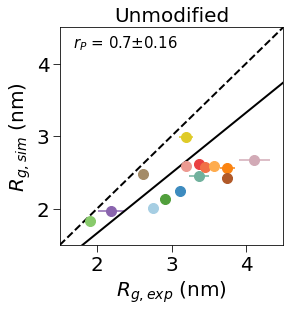

In [111]:
l = '1.00'

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in multidomain:

    Rg = np.genfromtxt(f'{data_dir}/MPs/PP/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
  
    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_multidomain[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_multidomain[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Plot
fig= plt.figure(figsize=(4,4))

plt.title('Unmodified', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

axis_max = 4.5
axis_min = 1.5
#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein, Rg_sim_vs_protein)
bootstrap_result = stats.bootstrap((Rg_exp_vs_protein,Rg_sim_vs_protein), pearsonoutput, vectorized=False, paired=True)    
pearson_err = bootstrap_result.standard_error
plt.text(0.17, 0.81, f'$r_{{P}}$ = {pearson:.1f}±{pearson_err:.2f}', fontsize=15, transform=fig.transFigure)

#Plot data points
for i,protein in enumerate(multidomain):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_multidomain[i], markersize=10)
    
fig.savefig('figures/Rg_multidomain_unmodified.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig('figures/Rg_multidomain_unmodified.pdf', bbox_inches='tight', pad_inches=1, dpi=400)


/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


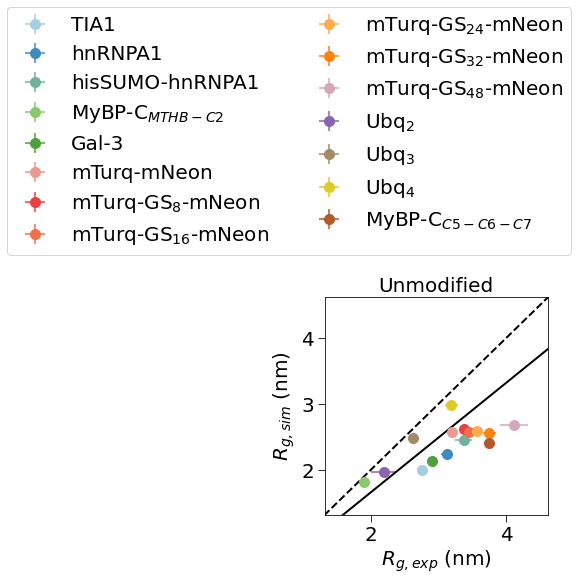

In [102]:
#Plot
fig= plt.figure(figsize=(4,4))

plt.title('Unmodified', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(multidomain):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_multidomain[i], markersize=10, label=multidomain_plotnames[protein])

#plt.legend(fontsize=20, ncol=int(len(multidomain)/3), bbox_to_anchor=(1.15, 1.15))
plt.legend(fontsize=20, ncol=2, bbox_to_anchor=(1.15, 1.15))
    
fig.savefig('figures/multidomain_legend.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig('figures/multidomain_legend.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


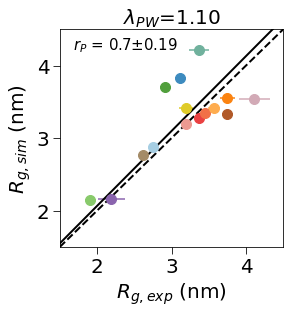

In [112]:
Rg_dir = f'{data_dir}/MPs/PW'

l = lambda_PW

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in multidomain:

    Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_multidomain[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_multidomain[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PW}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

axis_max = 4.5
axis_min = 1.5
#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein, Rg_sim_vs_protein)
bootstrap_result = stats.bootstrap((Rg_exp_vs_protein,Rg_sim_vs_protein), pearsonoutput, vectorized=False, paired=True)    
pearson_err = bootstrap_result.standard_error
plt.text(0.17, 0.81, f'$r_{{P}}$ = {pearson:.1f}±{pearson_err:.2f}', fontsize=15, transform=fig.transFigure)

#Plot data points
for i,protein in enumerate(multidomain):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_multidomain[i], markersize=10)

fig.savefig(f'figures/Rg_multidomain_PW_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_multidomain_PW_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-protein

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


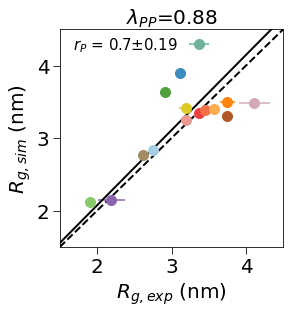

In [113]:
Rg_dir = f'{data_dir}/MPs/PP'

l = lambda_PP

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in multidomain:

    Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_multidomain[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_multidomain[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PP}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
axis_max = 4.5
axis_min = 1.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein, Rg_sim_vs_protein)
bootstrap_result = stats.bootstrap((Rg_exp_vs_protein,Rg_sim_vs_protein), pearsonoutput, vectorized=False, paired=True)    
pearson_err = bootstrap_result.standard_error
plt.text(0.17, 0.81, f'$r_{{P}}$ = {pearson:.1f}±{pearson_err:.2f}', fontsize=15, transform=fig.transFigure)

#Plot data points
for i,protein in enumerate(multidomain):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_multidomain[i], markersize=10)

fig.savefig(f'figures/Rg_multidomain_PP_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_multidomain_PP_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water backbone

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


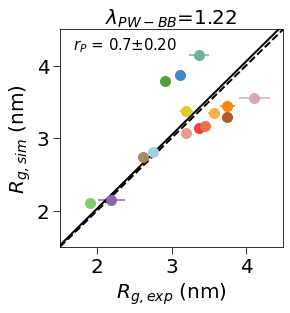

In [114]:
Rg_dir = f'{data_dir}/MPs/PW_BB'

l = lambda_PWBB

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in multidomain:

    if l == '1.00':
        Rg = np.genfromtxt(f'{data_dir}/MPs/PP/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
    else:
        Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_multidomain[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_multidomain[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PW-BB}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
axis_max = 4.5
axis_min = 1.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein, Rg_sim_vs_protein)
bootstrap_result = stats.bootstrap((Rg_exp_vs_protein,Rg_sim_vs_protein), pearsonoutput, vectorized=False, paired=True)    
pearson_err = bootstrap_result.standard_error
plt.text(0.17, 0.81, f'$r_{{P}}$ = {pearson:.1f}±{pearson_err:.2f}', fontsize=15, transform=fig.transFigure)

#Plot data points
for i,protein in enumerate(multidomain):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_multidomain[i], markersize=10)

fig.savefig(f'figures/Rg_multidomain_PWBB_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_multidomain_PWBB_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## mTurq-mNeon series

In [92]:
series_type = 'GS'
force_fields=['Unmodified', 'PW', 'PP']


multidomain_series = []
for protein in multidomain:
    if series_type in protein:
        multidomain_series.append(protein)

In [97]:
Rg_exp_vs_protein = []
Rg_exp_err_vs_protein = []
for protein in multidomain_series:
    Rg_exp_vs_protein.append(exp_Rg_multidomain[protein][0])
    Rg_exp_err_vs_protein.append(exp_Rg_multidomain[protein][1])
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_exp_err_vs_protein = np.array(Rg_exp_err_vs_protein)

Rg_sim_vs_protein_vs_ff={}
pearson_vs_ff={}
for ffmod in force_fields:
    Rg_dir = f'{data_dir}/MPs/{ffmod}'
    
    Rg_sim_vs_protein = []
    Rg_simerr_vs_protein = []
    for protein in multidomain_series:
        if ffmod == 'Unmodified':
            Rg = np.genfromtxt(f'{data_dir}/MPs/PP/{protein}/lambda_1.00/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
        elif ffmod == 'PW':
            Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_1.10/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
        elif ffmod == 'PP':
            Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_0.88/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

        Rg_sim_vs_protein.append(np.average(Rg))

        #Block error analysis
        blocks_stat = block.blocking(Rg)
        if errmethod != 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
        elif errmethod == 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)
        Rg_simerr_vs_protein.append(err)

    Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
    Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)
    
    Rg_sim_vs_protein_vs_ff[ffmod] = [Rg_sim_vs_protein, Rg_simerr_vs_protein]
    
    #Pearson corr.
    pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein, Rg_sim_vs_protein)
    check=False
    while check == False:
        bootstrap_result = stats.bootstrap((Rg_exp_vs_protein, Rg_sim_vs_protein), pearsonoutput, vectorized=False, paired=True)    
        pearson_err = bootstrap_result.standard_error
        if np.isnan(pearson_err) == False:
            check=True 
    pearson_vs_ff[ffmod] = [pearson, pearson_err]

    print(f'{ffmod} r_pearson = {pearson}+-{pearson_err}')


/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Unmodified r_pearson = 0.5703572180566223+-0.6486733865898353
PW r_pearson = 0.916906846601466+-0.09333785323625166
PP r_pearson = 0.8893425484023101+-0.09784154446597422


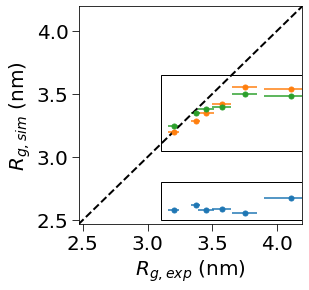

In [161]:
colors_pltdefault = plt.rcParams['axes.prop_cycle'].by_key()['color']

axischeck = Rg_exp_vs_protein
for ff in force_fields:
    axischeck = np.concatenate((axischeck,Rg_sim_vs_protein_vs_ff[ff][0]))

axismax = np.amax(axischeck)
axismin = np.amin(axischeck)
axismax += 0.02*axismax 
axismin -= 0.02*axismax 

fig = plt.figure(figsize=(4,4))

for i,ff in enumerate(force_fields):

    plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=5, c=colors_pltdefault[i])
    
plt.gca().add_patch(plt.Rectangle((3.1, 3.05), 1.2, 0.6, edgecolor='black', facecolor='none', lw=1))
plt.gca().add_patch(plt.Rectangle((3.1, 2.5), 1.2, 0.3, edgecolor='black', facecolor='none', lw=1))

#plot diagonal
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')

plt.xlim(axismin, axismax)
plt.ylim(axismin, axismax)

#plt.xlim(2.5, 3.0)
#plt.ylim(axismin, axismax)

plt.xticks([2.5, 3.0, 3.5, 4.0])
plt.yticks([2.5, 3.0, 3.5, 4.0])

plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/GSproteins_Rgsim_vs_Rgexp_withboxes.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/GSproteins_Rgsim_vs_Rgexp_withboxes.pdf", bbox_inches='tight', pad_inches=1, dpi=400)


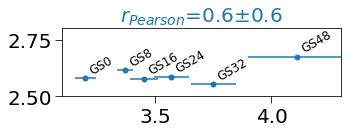

In [158]:
fig = plt.figure(figsize=(5,1.25))

ff='Unmodified'
plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=5, c=colors_pltdefault[0])
pearson=pearson_vs_ff[ff][0]
pearson_err=pearson_vs_ff[ff][1]
plt.title(f'$r_{{Pearson}}$={pearson:.1f}±{pearson_err:.1f}', fontsize=20, c=colors_pltdefault[0])

#plot diagonal
x=[0,5]
y=[0,5]
plt.plot(x,y,'--',linewidth=2,color='black')

for i,protein in enumerate(multidomain_series):
    plt.text(Rg_exp_vs_protein[i]+0.01, Rg_sim_vs_protein_vs_ff[ff][0][i]+0.02, protein, fontsize=12, rotation=30)

plt.xlim(3.1, 4.3) #1.2 diff
plt.ylim(2.5, 2.8) #0.6 diff

#plt.xticks([2.6, 2.8, 3.0, 3.2])
#plt.yticks([2.6, 2.8, 3.0, 3.2])

#plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
#plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/GSproteins_Rgsim_vs_Rgexp_Unmodifiedonly.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/GSproteins_Rgsim_vs_Rgexp_Unmodifiedonly.png", bbox_inches='tight', pad_inches=1, dpi=400)


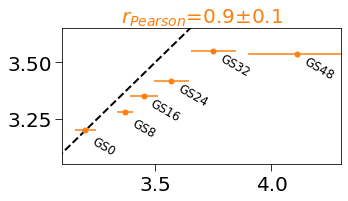

In [159]:
fig = plt.figure(figsize=(5,2.5))

ff='PW'
plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=5, c=colors_pltdefault[1])
pearson=pearson_vs_ff[ff][0]
pearson_err=pearson_vs_ff[ff][1]
plt.title(f'$r_{{Pearson}}$={pearson:.1f}±{pearson_err:.1f}', fontsize=20, c=colors_pltdefault[1])

#plot diagonal
x=[0,5]
y=[0,5]
plt.plot(x,y,'--',linewidth=2,color='black')

for i,protein in enumerate(multidomain_series):
    plt.text(Rg_exp_vs_protein[i]+0.02, Rg_sim_vs_protein_vs_ff[ff][0][i]-0.11, protein, fontsize=12, rotation=-30)

plt.xlim(3.1, 4.3) #1.2 diff
plt.ylim(3.05, 3.65) #0.6 diff

#plt.xticks([2.6, 2.8, 3.0, 3.2])
#plt.yticks([2.6, 2.8, 3.0, 3.2])

#plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
#plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/GSproteins_Rgsim_vs_Rgexp_PWonly.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/GSproteins_Rgsim_vs_Rgexp_PWonly.png", bbox_inches='tight', pad_inches=1, dpi=400)


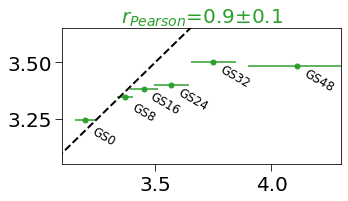

In [160]:
fig = plt.figure(figsize=(5,2.5))

ff='PP'
plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=5, c=colors_pltdefault[2])
pearson_PW=pearson_vs_ff[ff][0]
pearson_err_PW=pearson_vs_ff[ff][1]
plt.title(f'$r_{{Pearson}}$={pearson:.1f}±{pearson_err:.1f}', fontsize=20, c=colors_pltdefault[2])

#plot diagonal
x=[0,5]
y=[0,5]
plt.plot(x,y,'--',linewidth=2,color='black')

for i,protein in enumerate(multidomain_series):
    plt.text(Rg_exp_vs_protein[i]+0.02, Rg_sim_vs_protein_vs_ff[ff][0][i]-0.11, protein, fontsize=12, rotation=-30)

plt.xlim(3.1, 4.3) #1.2 diff
plt.ylim(3.05, 3.65) #0.6 diff

#plt.xticks([2.6, 2.8, 3.0, 3.2])
#plt.yticks([2.6, 2.8, 3.0, 3.2])

#plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
#plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/GSproteins_Rgsim_vs_Rgexp_PPonly.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/GSproteins_Rgsim_vs_Rgexp_PPonly.png", bbox_inches='tight', pad_inches=1, dpi=400)


# SAXS chi2 IDPs

## Protein-protein

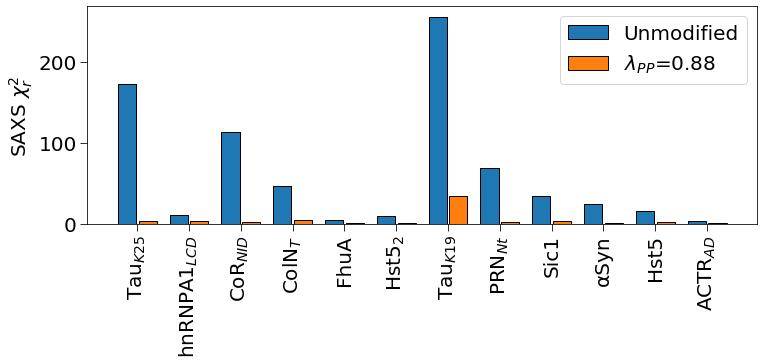

In [20]:
SAXS_chi2_pkl = f'{data_dir}/IDPs/PP/martini3saxs_IDP_PP.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

xaxis_labels = []

chi2_lambda1_vs_protein = []
chi2_lambda2_vs_protein = []
for protein in IDPs:
    chi2_lambda1 = SAXS_chi2[protein].loc['1.00']
    chi2_lambda1_vs_protein.append(chi2_lambda1)
    chi2_lambda2 = SAXS_chi2[protein].loc[lambda_PP]
    chi2_lambda2_vs_protein.append(chi2_lambda2)
    xaxis_labels.append(IDPs_plotnames[protein])

xaxismid = np.arange(1,len(IDPs)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2

fig = plt.figure(figsize=(len(IDPs), 4))

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.35, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein, width=0.35, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation='vertical', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.legend(fontsize=20, loc='upper right')

fig.savefig(f'figures/SAXSchi2_IDPs_PP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_IDPs_PP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

$\chi^2_r$ original: 63.4 ± 21.9, chi2_PW: 4.84 +- 2.0277319112137975


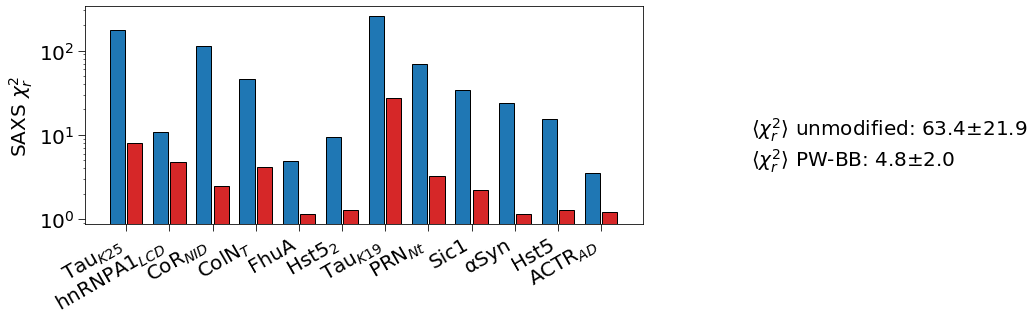

In [131]:
colors_pltdefault = plt.rcParams['axes.prop_cycle'].by_key()['color']

SAXS_chi2_pkl = f'{data_dir}/IDPs/PP/martini3saxs_IDP_PP.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

xaxis_labels = []
chi2_lambda1_vs_protein = []
for protein in IDPs:
    chi2_lambda1 = SAXS_chi2[protein].loc['1.00']
    chi2_lambda1_vs_protein.append(chi2_lambda1)
    xaxis_labels.append(IDPs_plotnames[protein])

SAXS_chi2_pkl = f'{data_dir}/IDPs/PW_BB/martini3saxs_IDP_PW_BB.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

chi2_lambda2_vs_protein = []
for protein in IDPs:
    chi2_lambda2 = SAXS_chi2[protein].loc[lambda_PWBB]
    chi2_lambda2_vs_protein.append(chi2_lambda2)

xaxismid = np.arange(1,len(IDPs)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2

print(f'$\chi^2_r$ original: {np.average(chi2_lambda1_vs_protein):.1f} ± {(np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein))):.1f}, chi2_PW: {np.average(chi2_lambda2_vs_protein):.2f} +- {np.std(chi2_lambda2_vs_protein)/np.sqrt(len(chi2_lambda2_vs_protein))}')

fig = plt.figure(figsize=(len(IDPs)-2, 4))

fig.text(1.05, 0.5, f'⟨$\chi^2_r$⟩ unmodified: {np.average(chi2_lambda1_vs_protein):.1f}±{np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein)):.1f}\n⟨$\chi^2_r$⟩ PW-BB: {np.average(chi2_lambda2_vs_protein):.1f}±{np.std(chi2_lambda2_vs_protein)/np.sqrt(len(chi2_lambda2_vs_protein)):.1f}', ha='left', va='top', fontsize=20)

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.35, edgecolor='black', label='Unmodified', color=colors_pltdefault[0])
plt.bar(xaxis2, chi2_lambda2_vs_protein, width=0.35, edgecolor='black', label=f'$λ_{{PW-BB}}$={lambda_PWBB}', color=colors_pltdefault[3])

plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.semilogy()
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
#plt.legend(fontsize=20, loc='upper right')

fig.savefig(f'figures/SAXSchi2_IDPs_PWBB.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_IDPs_PWBB.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-protein and protein-water together

$\chi^2_r$ original: 63.4 ± 21.9, chi2_PW: 4.49 +- 2.2236019333669854, chi2_PP: +- 2.5807219754830926


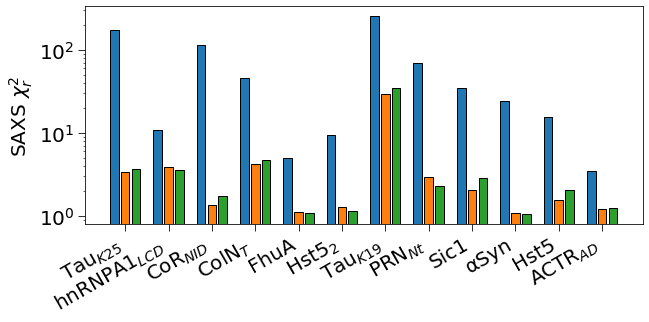

In [24]:
SAXS_chi2_PP_pkl = f'{data_dir}/IDPs/PP/martini3saxs_IDP_PP.pkl'
SAXS_chi2_PW_pkl = f'{data_dir}/IDPs/PW/martini3saxs_idp.pkl'

SAXS_chi2_PP = load_pickle5(SAXS_chi2_PP_pkl)
SAXS_chi2_PW = load_pickle5(SAXS_chi2_PW_pkl)


xaxis_labels = []

chi2_lambda1_vs_protein = []
chi2_lambda2_vs_protein_PW = []
chi2_lambda2_vs_protein_PP = []

for protein in IDPs:
    chi2_lambda1 = SAXS_chi2_PP[protein].loc['1.00']
    chi2_lambda1_vs_protein.append(chi2_lambda1)
    chi2_lambda2_PP = SAXS_chi2_PP[protein].loc[lambda_PP]
    chi2_lambda2_vs_protein_PP.append(chi2_lambda2_PP)
    
    chi2_lambda2_PW = SAXS_chi2_PW[protein].loc[lambda_PW]
    chi2_lambda2_vs_protein_PW.append(chi2_lambda2_PW)
    
    xaxis_labels.append(IDPs_plotnames[protein])
    
xaxismid = np.arange(1,len(IDPs)+1,1)
xaxis1 = xaxismid-0.25
xaxis2 = xaxismid
xaxis3 = xaxismid+0.25

print(f'$\chi^2_r$ original: {np.average(chi2_lambda1_vs_protein):.1f} ± {(np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein))):.1f}, chi2_PW: {np.average(chi2_lambda2_vs_protein_PW):.2f} +- {np.std(chi2_lambda2_vs_protein_PW)/np.sqrt(len(chi2_lambda2_vs_protein_PW))}, chi2_PP: +- {np.std(chi2_lambda2_vs_protein_PP/np.sqrt(len(chi2_lambda2_vs_protein_PP)))}')

fig = plt.figure(figsize=(len(IDPs)-2, 4))

#fig.text(1.05, 0.5, f'⟨$\chi^2_r$⟩ unmodified: {np.average(chi2_lambda1_vs_protein):.1f}±{np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein)):.1f}\n⟨$\chi^2_r$⟩ PW: {np.average(chi2_lambda2_vs_protein_PW):.1f}±{np.std(chi2_lambda2_vs_protein_PW)/np.sqrt(len(chi2_lambda2_vs_protein_PW)):.1f}\n⟨$\chi^2_r$⟩ PP: {np.average(chi2_lambda2_vs_protein_PP):.1f}±{np.std(chi2_lambda2_vs_protein_PP)/np.sqrt(len(chi2_lambda2_vs_protein_PP)):.1f}', ha='left', va='top', fontsize=20)

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.20, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein_PW, width=0.20, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PW}')
plt.bar(xaxis3, chi2_lambda2_vs_protein_PP, width=0.20, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.semilogy()
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
#plt.legend(fontsize=20, loc='upper right')

fig.savefig(f'figures/SAXSchi2_IDPs_PWandPP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_IDPs_PWandPP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

# SAXS chi2 multidomain

In [125]:
SAXS_chi2_pkl = f'{data_dir}/MPs/PP/martini3saxs_MP_PP.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

chi2_lambda1_vs_protein = []

xaxis_labels = []

for protein in multidomain_alt:
    chi2_lambda1 = SAXS_chi2[protein].loc['1.00']
    chi2_lambda1_vs_protein.append(chi2_lambda1)
    xaxis_labels.append(multidomain_alt_plotnames[protein])

## Protein-water

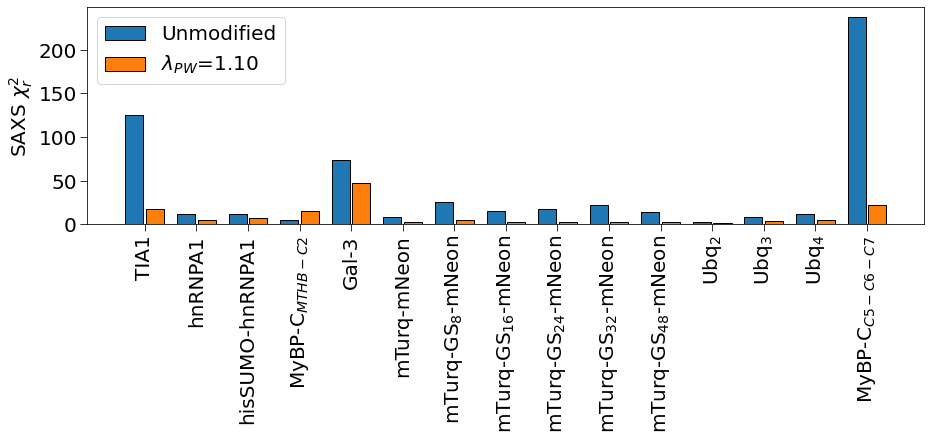

In [126]:
SAXS_chi2_pkl = f'{data_dir}/MPs/PW/martini3saxs_MP_PW.pkl'
SAXS_chi2_pkl_2 = f'{data_dir}/MPs/PW/martini3saxs_md.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)
SAXS_chi2_2 = load_pickle5(SAXS_chi2_pkl_2)

for protein in SAXS_chi2_2:
    
    SAXS_chi2[protein] = SAXS_chi2_2[protein]
    
chi2_lambda2_vs_protein = []
for protein in multidomain_alt:
    chi2_lambda2 = SAXS_chi2[protein].loc[lambda_PW]
    chi2_lambda2_vs_protein.append(chi2_lambda2)

xaxismid = np.arange(1,len(multidomain_alt)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2

fig = plt.figure(figsize=(len(multidomain_alt), 4))

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.35, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein, width=0.35, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PW}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation='vertical', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.legend(fontsize=20, loc='upper left')

fig.savefig(f'figures/SAXSchi2_multidomain_PW.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_multidomain_PW.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-protein

In [127]:
SAXS_chi2_pkl = f'{data_dir}/MPs/PP/martini3saxs_MP_PP.pkl'

In [128]:
SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

chi2_lambda2_vs_protein = []
for protein in multidomain_alt:
    chi2_lambda2 = SAXS_chi2[protein].loc[lambda_PP]
    chi2_lambda2_vs_protein.append(chi2_lambda2)

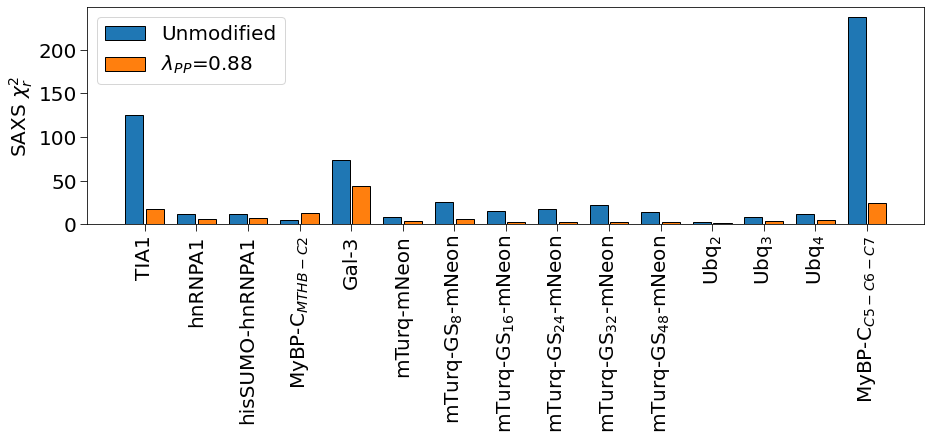

In [129]:
xaxismid = np.arange(1,len(multidomain_alt)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2

fig = plt.figure(figsize=(len(multidomain_alt), 4))

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.35, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein, width=0.35, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation='vertical', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.legend(fontsize=20, loc='upper left')

fig.savefig(f'figures/SAXSchi2_multidomain_PP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_multidomain_PP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water backbone

$\chi^2_r$ original: 39.2 ± 15.9, chi2_PW: 8.57 +- 3.234902676709312


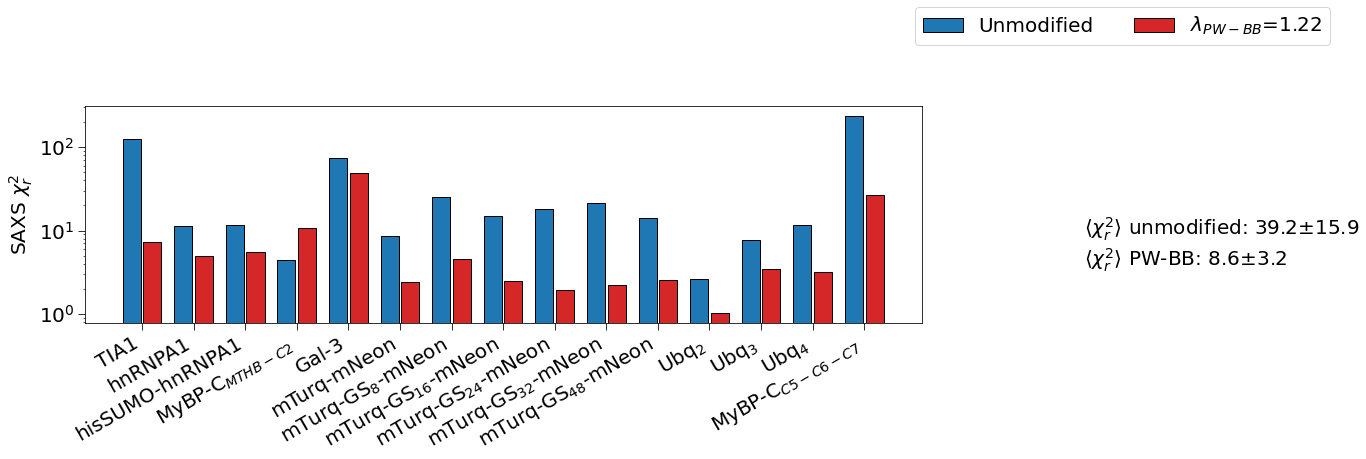

In [130]:
colors_pltdefault = plt.rcParams['axes.prop_cycle'].by_key()['color']

SAXS_chi2_pkl = f'{data_dir}/MPs/PW_BB/martini3saxs_MP_PW_BB.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

chi2_lambda2_vs_protein = []
for protein in multidomain_alt:
    chi2_lambda2 = SAXS_chi2[protein].loc[lambda_PWBB]
    chi2_lambda2_vs_protein.append(chi2_lambda2)

xaxismid = np.arange(1,len(multidomain_alt)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2

print(f'$\chi^2_r$ original: {np.average(chi2_lambda1_vs_protein):.1f} ± {(np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein))):.1f}, chi2_PW: {np.average(chi2_lambda2_vs_protein):.2f} +- {np.std(chi2_lambda2_vs_protein)/np.sqrt(len(chi2_lambda2_vs_protein))}')

fig = plt.figure(figsize=(len(multidomain_alt), 4))

fig.text(1.05, 0.5, f'⟨$\chi^2_r$⟩ unmodified: {np.average(chi2_lambda1_vs_protein):.1f}±{np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein)):.1f}\n⟨$\chi^2_r$⟩ PW-BB: {np.average(chi2_lambda2_vs_protein):.1f}±{np.std(chi2_lambda2_vs_protein)/np.sqrt(len(chi2_lambda2_vs_protein)):.1f}', ha='left', va='top', fontsize=20)

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.35, edgecolor='black', label='Unmodified', color=colors_pltdefault[0])
plt.bar(xaxis2, chi2_lambda2_vs_protein, width=0.35, edgecolor='black', label=f'$λ_{{PW-BB}}$={lambda_PWBB}', color=colors_pltdefault[3])

plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.semilogy()
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1.5,1.5), ncol=2) #bbox_to_anchor=(1.5,1.5))

fig.savefig(f'figures/SAXSchi2_multidomain_PWBB.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_multidomain_PWBB.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water and protein-protein together

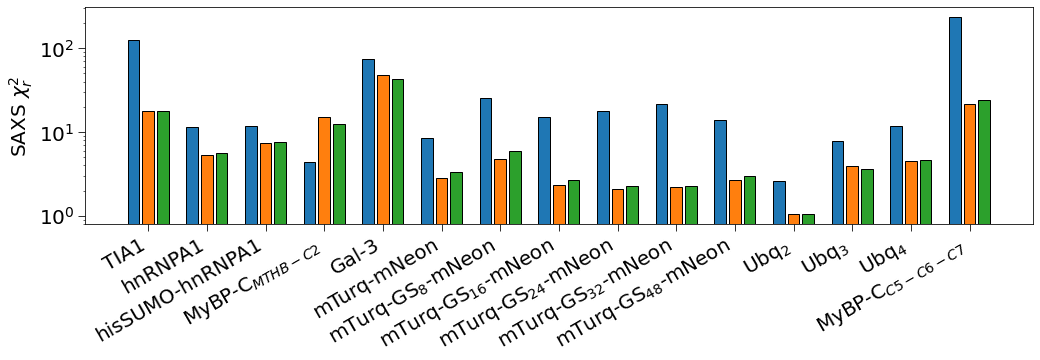

In [31]:
SAXS_chi2_pkl_PW = f'{data_dir}/MPs/PW/martini3saxs_MP_PW.pkl'
SAXS_chi2_pkl_PW_2 = f'{data_dir}/MPs/PW/martini3saxs_md.pkl'
SAXS_chi2_pkl_PP = f'{data_dir}/MPs/PP/martini3saxs_MP_PP.pkl'

SAXS_chi2_PW = load_pickle5(SAXS_chi2_pkl_PW)
SAXS_chi2_PW_2 = load_pickle5(SAXS_chi2_pkl_PW_2)
SAXS_chi2_PP = load_pickle5(SAXS_chi2_pkl_PP)

for protein in SAXS_chi2_PW_2:
    
    SAXS_chi2_PW[protein] = SAXS_chi2_PW_2[protein]
    
chi2_lambda2_vs_protein_PW = []
chi2_lambda2_vs_protein_PP = []

for protein in multidomain_alt:
    chi2_lambda2_PW = SAXS_chi2_PW[protein].loc[lambda_PW]
    chi2_lambda2_vs_protein_PW.append(chi2_lambda2_PW)
    
    chi2_lambda2_PP = SAXS_chi2_PP[protein].loc[lambda_PP]
    chi2_lambda2_vs_protein_PP.append(chi2_lambda2_PP)


xaxismid = np.arange(1,len(multidomain_alt)+1,1)
xaxis1 = xaxismid-0.25
xaxis2 = xaxismid
xaxis3 = xaxismid+0.25

fig = plt.figure(figsize=(len(multidomain)+2, 4))

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.2, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein_PW, width=0.2, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PW}')
plt.bar(xaxis3, chi2_lambda2_vs_protein_PP, width=0.2, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

#plt.xticks(xaxismid, labels=xaxis_labels, rotation='vertical', fontsize=20)
plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.semilogy()
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
#plt.legend(fontsize=20, loc='upper left') #bbox_to_anchor=(1.5,1.5))

fig.savefig(f'figures/SAXSchi2_multidomain_PWandPP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_multidomain_PWandPP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

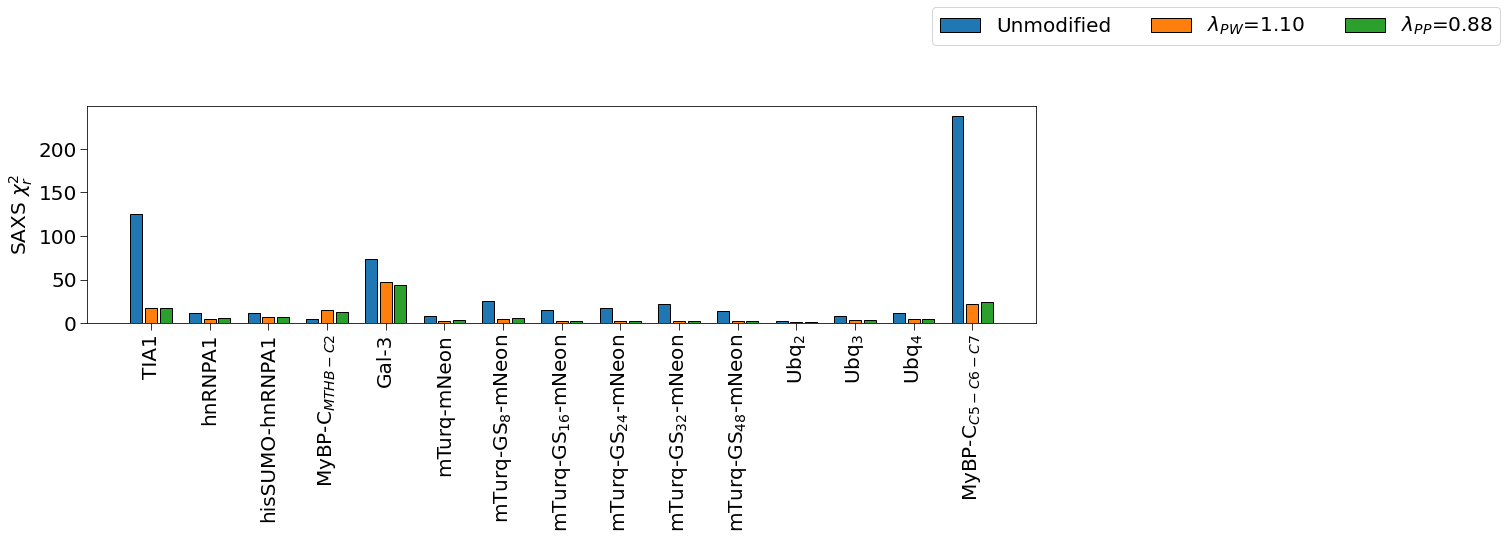

In [32]:
SAXS_chi2_pkl_PW = f'{data_dir}/MPs/PW/martini3saxs_MP_PW.pkl'
SAXS_chi2_pkl_PW_2 = f'{data_dir}/MPs/PW/martini3saxs_md.pkl'
SAXS_chi2_pkl_PP = f'{data_dir}/MPs/PP/martini3saxs_MP_PP.pkl'


SAXS_chi2_PW = load_pickle5(SAXS_chi2_pkl_PW)
SAXS_chi2_PW_2 = load_pickle5(SAXS_chi2_pkl_PW_2)
SAXS_chi2_PP = load_pickle5(SAXS_chi2_pkl_PP)

for protein in SAXS_chi2_PW_2:
    
    SAXS_chi2_PW[protein] = SAXS_chi2_PW_2[protein]
    
chi2_lambda2_vs_protein_PW = []
chi2_lambda2_vs_protein_PP = []

for protein in multidomain_alt:
    chi2_lambda2_PW = SAXS_chi2_PW[protein].loc[lambda_PW]
    chi2_lambda2_vs_protein_PW.append(chi2_lambda2_PW)
    
    chi2_lambda2_PP = SAXS_chi2_PP[protein].loc[lambda_PP]
    chi2_lambda2_vs_protein_PP.append(chi2_lambda2_PP)


xaxismid = np.arange(1,len(multidomain_alt)+1,1)
xaxis1 = xaxismid-0.25
xaxis2 = xaxismid
xaxis3 = xaxismid+0.25

fig = plt.figure(figsize=(len(multidomain)+2, 4))

#fig.text(1.05, 0.5, f'⟨$\chi^2_r$⟩ unmodified: {np.average(chi2_lambda1_vs_protein):.1f}±{np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein)):.1f}\n⟨$\chi^2_r$⟩ PW: {np.average(chi2_lambda2_vs_protein_PW):.1f}±{np.std(chi2_lambda2_vs_protein_PW)/np.sqrt(len(chi2_lambda2_vs_protein_PW)):.1f}\n⟨$\chi^2_r$⟩ PP: {np.average(chi2_lambda2_vs_protein_PP):.1f}±{np.std(chi2_lambda2_vs_protein_PP)/np.sqrt(len(chi2_lambda2_vs_protein_PP)):.1f}', ha='left', va='top', fontsize=20)

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.2, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein_PW, width=0.2, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PW}')
plt.bar(xaxis3, chi2_lambda2_vs_protein_PP, width=0.2, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation='vertical', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1.5,1.5), ncol=3) #bbox_to_anchor=(1.5,1.5))

fig.savefig(f'figures/SAXSchi2_multidomain_PWandPP_legend.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_multidomain_PWandPP_legend.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

# A1 variants

In [7]:
proteins = ['WT', 'm10R', 'm10Rp10K', 'm12Fp12Y', 'm6Rp6K', 'p7Fm7Y', 'p7Kp12D']
protein_plotnames = {'WT':'WT', 
                     'm10R':'-10R', 
                     'm10Rp10K':'-10R+10K', 
                     'm12Fp12Y':'-12F+12Y', 
                     'm6Rp6K':'-6R+6K', 
                     'p7Fm7Y':'+7F-7Y', 
                     'p7Kp12D':'+7K+12D'}
force_fields = ['martini_v300_original', 'martini_v300_mod_PP_0.88', 'martini_v300_mod_PP_0.92']
force_fields_plotnames = {'martini_v300_original':'Unmodified', 'martini_v300_mod_PP_0.88':'$\lambda_{PP}$=0.88', 'martini_v300_mod_PP_0.92':'$\lambda_{PP}$=0.92'}
#Rg_exp = {'WT': [2.76, 0.05], 'm10R':[2.67, 0.05], 'm10Rp10K':[2.85, 0.05], 'm12Fp12Y':[2.60, 0.05], 'm6Rp6K':[2.79, 0.05], 'p7Fm7Y':[2.72, 0.05], 'p7Kp12D':[2.92, 0.05]}
Rg_exp = {'WT': [2.760, 0.016], 'm10R':[2.671, 0.007], 'm10Rp10K':[2.849, 0.005], 'm12Fp12Y':[2.604, 0.020], 'm6Rp6K':[2.787, 0.008], 'p7Fm7Y':[2.718, 0.013], 'p7Kp12D':[2.921, 0.008]}

errmethod = 'hline' #for blocking

In [8]:
Rg_exp_vs_protein = []
Rg_exp_err_vs_protein = []

for protein in proteins:
    Rg_exp_vs_protein.append(Rg_exp[protein][0])
    Rg_exp_err_vs_protein.append(Rg_exp[protein][1])
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_exp_err_vs_protein = np.array(Rg_exp_err_vs_protein) 
    
Rg_sim_vs_protein_vs_ff = {}

for ff in force_fields:
    
    Rg_sim_vs_protein = []
    Rg_sim_err_vs_protein = []
    
    for protein in proteins:
       
        time, Rg = np.genfromtxt(f'A1_variants/Production_run/calc_Rg/Rg_gyrate_{protein}_{ff}.xvg', skip_header=27, usecols=(0,1), unpack=True)

        #Block error analysis
        blocks_stat = block.blocking(Rg)
        if errmethod != 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
        elif errmethod == 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

        Rg_avg = np.average(Rg)

        Rg_sim_vs_protein.append(Rg_avg)
        Rg_sim_err_vs_protein.append(err)

    Rg_sim_vs_protein_vs_ff[ff] = [np.array(Rg_sim_vs_protein), np.array(Rg_sim_err_vs_protein)]

/storage1/thomasen/software/BLOCKING_OLD/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


In [9]:
pearson_vs_ff = {}
spearman_vs_ff = {}

for ff in force_fields:
    
    pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0])
    bootstrap_result = stats.bootstrap((Rg_exp_vs_protein,Rg_sim_vs_protein_vs_ff[ff][0]), pearsonoutput, vectorized=False, paired=True)    
    pearson_err = bootstrap_result.standard_error
    
    spearman, pval_spearman = stats.spearmanr(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0])
    bootstrap_result = stats.bootstrap((Rg_exp_vs_protein,Rg_sim_vs_protein_vs_ff[ff][0]), spearmanoutput, vectorized=False, paired=True)    
    spearman_err = bootstrap_result.standard_error

    pearson_vs_ff[ff] = [pearson, pearson_err]
    spearman_vs_ff[ff] = [spearman, spearman_err]

[3 1 5 0 4 2 6]


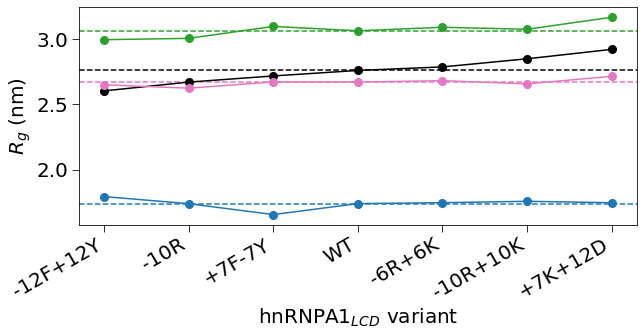

In [10]:
colors_pltdefault = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors_pltdefault = [colors_pltdefault[0], colors_pltdefault[2], colors_pltdefault[6]]

fig= plt.figure(figsize=(10,4))

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.xlabel('hnRNPA1$_{LCD}$ variant', fontsize=20)
plt.ylabel('$\it{R}$$_{g}$ (nm)', fontsize=20)

idxs = np.argsort(Rg_exp_vs_protein)
print(idxs)

Rg_exp_vs_protein_sort = Rg_exp_vs_protein[idxs]
Rg_exp_err_vs_protein_sort = Rg_exp_err_vs_protein[idxs]
plt.errorbar(range(len(Rg_exp_vs_protein_sort)), Rg_exp_vs_protein_sort, yerr=Rg_exp_err_vs_protein_sort, fmt='-o', markersize=8, c='black', label='Experimental')
plt.axhline(Rg_exp['WT'][0], linestyle='--', c='black')

for i,ff in enumerate(force_fields):
    Rg_sim_vs_protein = Rg_sim_vs_protein_vs_ff[ff][0][idxs]
    Rg_sim_err_vs_protein = Rg_sim_vs_protein_vs_ff[ff][1][idxs]
    plt.errorbar(range(len(Rg_sim_vs_protein)), Rg_sim_vs_protein, yerr=Rg_sim_err_vs_protein, fmt='-o', markersize=8, c=colors_pltdefault[i])
    plt.axhline(Rg_sim_vs_protein_vs_ff[ff][0][0], linestyle='--', c=colors_pltdefault[i])

protein_labels_sorted=[]
for i in idxs:
    protein_labels_sorted.append(protein_plotnames[proteins[i]])
    
plt.xticks(ticks=range(len(proteins)), labels=protein_labels_sorted, rotation=30, fontsize=20, ha='right')
#plt.legend(fontsize=20, bbox_to_anchor=(1.10, 1.0))

fig.savefig("figures/A1_variants_Rg_vs_protein.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_variants_Rg_vs_protein.png", bbox_inches='tight', pad_inches=1, dpi=400)


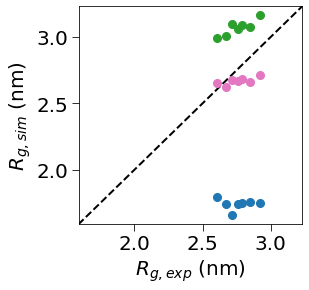

In [11]:
axischeck = Rg_exp_vs_protein
for ff in force_fields:
    axischeck = np.concatenate((axischeck,Rg_sim_vs_protein_vs_ff[ff][0]))

axismax = np.amax(axischeck)
axismin = np.amin(axischeck)
axismax += 0.02*axismax 
axismin -= 0.02*axismax 

fig = plt.figure(figsize=(4,4))

for i,ff in enumerate(force_fields):

    plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=8, c=colors_pltdefault[i])
    
#plot diagonal
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')

plt.xlim(axismin, axismax)
plt.ylim(axismin, axismax)

#plt.xlim(2.5, 3.0)
#plt.ylim(axismin, axismax)

plt.xticks([2, 2.5, 3])
plt.yticks([2, 2.5, 3])

plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp.png", bbox_inches='tight', pad_inches=1, dpi=400)


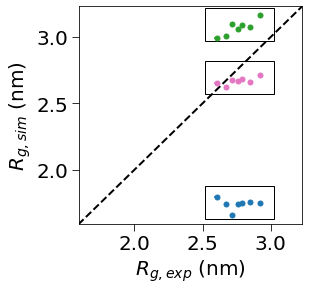

In [12]:
axischeck = Rg_exp_vs_protein
for ff in force_fields:
    axischeck = np.concatenate((axischeck,Rg_sim_vs_protein_vs_ff[ff][0]))

axismax = np.amax(axischeck)
axismin = np.amin(axischeck)
axismax += 0.02*axismax 
axismin -= 0.02*axismax 

fig = plt.figure(figsize=(4,4))

for i,ff in enumerate(force_fields):

    plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=5, c=colors_pltdefault[i])
    
plt.gca().add_patch(plt.Rectangle((2.52, 1.63), 0.5, 0.25, edgecolor='black', facecolor='none', lw=1))
plt.gca().add_patch(plt.Rectangle((2.52, 2.97), 0.5, 0.25, edgecolor='black', facecolor='none', lw=1))
plt.gca().add_patch(plt.Rectangle((2.52, 2.57), 0.5, 0.25, edgecolor='black', facecolor='none', lw=1))

#plot diagonal
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')

plt.xlim(axismin, axismax)
plt.ylim(axismin, axismax)

#plt.xlim(2.5, 3.0)
#plt.ylim(axismin, axismax)

plt.xticks([2, 2.5, 3])
plt.yticks([2, 2.5, 3])

plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_withboxes.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_withboxes.png", bbox_inches='tight', pad_inches=1, dpi=400)


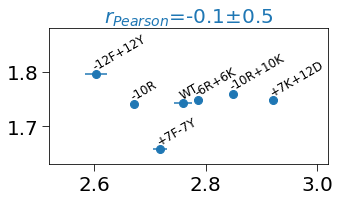

In [13]:
fig = plt.figure(figsize=(5,2.5))

ff = 'martini_v300_original'
plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=8, c=colors_pltdefault[0])

#plot diagonal
x=[0,5]
y=[0,5]
plt.plot(x,y,'--',linewidth=2,color='black')

for i,protein in enumerate(proteins):
    plt.text(Rg_exp_vs_protein[i]-0.01, Rg_sim_vs_protein_vs_ff[ff][0][i]+0.008, protein_plotnames[protein], fontsize=12, rotation=30)

plt.title(f'$r_{{Pearson}}$={pearson_vs_ff[ff][0]:.1f}±{pearson_vs_ff[ff][1]:.1f}', fontsize=20, c=colors_pltdefault[0])

plt.xlim(2.52, 3.02) #0.5 diff
plt.ylim(1.63, 1.88) #0.25 diff

#plt.xticks([2.6, 2.8, 3.0, 3.2])
#plt.yticks([2.6, 2.8, 3.0, 3.2])

#plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
#plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_unmodifiedonly.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_unmodifiedonly.png", bbox_inches='tight', pad_inches=1, dpi=400)


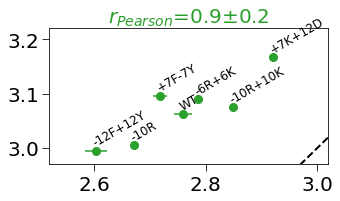

In [14]:
fig = plt.figure(figsize=(5,2.5))

ff = 'martini_v300_mod_PP_0.88'
plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=8, c=colors_pltdefault[1])

#plot diagonal
x=[0,5]
y=[0,5]
plt.plot(x,y,'--',linewidth=2,color='black')

for i,protein in enumerate(proteins):
    plt.text(Rg_exp_vs_protein[i]-0.01, Rg_sim_vs_protein_vs_ff[ff][0][i]+0.008, protein_plotnames[protein], fontsize=12, rotation=30)

plt.title(f'$r_{{Pearson}}$={pearson_vs_ff[ff][0]:.1f}±{pearson_vs_ff[ff][1]:.1f}', fontsize=20, c=colors_pltdefault[1])

plt.xlim(2.52, 3.02) #0.5 diff
plt.ylim(2.97, 3.22) #0.25 diff

#plt.xticks([2.6, 2.8, 3.0, 3.2])
#plt.yticks([2.6, 2.8, 3.0, 3.2])

#plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
#plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_PP0.88only.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_PP0.88only.png", bbox_inches='tight', pad_inches=1, dpi=400)


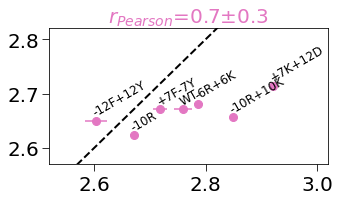

In [15]:
fig = plt.figure(figsize=(5,2.5))

ff = 'martini_v300_mod_PP_0.92'
plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=8, c=colors_pltdefault[2])

#plot diagonal
x=[0,5]
y=[0,5]
plt.plot(x,y,'--',linewidth=2,color='black')

for i,protein in enumerate(proteins):
    plt.text(Rg_exp_vs_protein[i]-0.01, Rg_sim_vs_protein_vs_ff[ff][0][i]+0.008, protein_plotnames[protein], fontsize=12, rotation=30)

plt.title(f'$r_{{Pearson}}$={pearson_vs_ff[ff][0]:.1f}±{pearson_vs_ff[ff][1]:.1f}', fontsize=20, c=colors_pltdefault[2])

plt.xlim(2.52, 3.02) #0.5 diff
plt.ylim(2.57, 2.82) #0.25 diff

#plt.xticks([2.6, 2.8, 3.0, 3.2])
#plt.yticks([2.6, 2.8, 3.0, 3.2])

#plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
#plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_PP0.92only.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_PP0.92only.png", bbox_inches='tight', pad_inches=1, dpi=400)


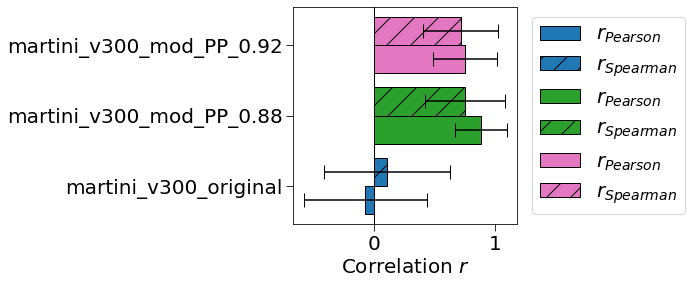

In [16]:
fig = plt.figure(figsize=(4,4))

plt.yticks(range(len(force_fields)), labels=force_fields)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.xlabel('Correlation $r$', fontsize=20)

for i,ff in enumerate(force_fields):
    plt.barh(i-0.2, pearson_vs_ff[ff][0], xerr=pearson_vs_ff[ff][1], capsize=7.0, height=0.4, color=colors_pltdefault[i], lw=1, edgecolor='black', label='$r_{Pearson}$')
    plt.barh(i+0.2, spearman_vs_ff[ff][0], xerr=spearman_vs_ff[ff][1], capsize=7.0, height=0.4, color=colors_pltdefault[i], lw=1, edgecolor='black', hatch='/', label='$r_{Spearman}$')
    plt.axvline(0, ls='-', lw=1, c='black')

plt.legend(fontsize=20, bbox_to_anchor=(1.8,1.0))

#fig.savefig("figures/A1_variants_correlation_vs_ff.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
#fig.savefig("figures/A1_varaints_correlation_vs_ff.png", bbox_inches='tight', pad_inches=1, dpi=400)

{'martini_v300_original': [-0.07187387427101052, 0.5070820398164658], 'martini_v300_mod_PP_0.88': [0.8799705550107253, 0.21197851176915233], 'martini_v300_mod_PP_0.92': [0.747032131256011, 0.2635298144939848]}
{'martini_v300_original': [0.10714285714285716, 0.5187803487834735], 'martini_v300_mod_PP_0.88': [0.7500000000000002, 0.32589704526593016], 'martini_v300_mod_PP_0.92': [0.7142857142857144, 0.3112164509693181]}


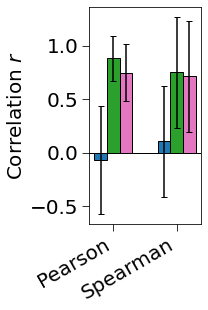

In [17]:
fig = plt.figure(figsize=(2,4))

#plt.yticks(range(len(force_fields)), labels=force_fields)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.ylabel('Correlation $r$', fontsize=20)

plt.bar(1-0.2, pearson_vs_ff[force_fields[0]][0], yerr=pearson_vs_ff[force_fields[0]][1], capsize=3.0, width=0.2, color=colors_pltdefault[0], lw=1, edgecolor='black')
plt.bar(1, pearson_vs_ff[force_fields[1]][0], yerr=pearson_vs_ff[force_fields[1]][1], capsize=3.0, width=0.2, color=colors_pltdefault[1], lw=1, edgecolor='black')
plt.bar(1+0.2, pearson_vs_ff[force_fields[2]][0], yerr=pearson_vs_ff[force_fields[2]][1], capsize=3.0, width=0.2, color=colors_pltdefault[2], lw=1, edgecolor='black')

plt.bar(2-0.2, spearman_vs_ff[force_fields[0]][0], yerr=spearman_vs_ff[force_fields[0]][1], capsize=3.0, width=0.2, color=colors_pltdefault[0], lw=1, edgecolor='black')
plt.bar(2, spearman_vs_ff[force_fields[1]][0], yerr=spearman_vs_ff[force_fields[0]][1], capsize=3.0, width=0.2, color=colors_pltdefault[1], lw=1, edgecolor='black')
plt.bar(2+0.2, spearman_vs_ff[force_fields[2]][0], yerr=spearman_vs_ff[force_fields[0]][1], capsize=3.0, width=0.2, color=colors_pltdefault[2], lw=1, edgecolor='black')

plt.xticks(ticks=[1,2], labels=['Pearson', 'Spearman'], rotation=30, fontsize=20, ha='right')

#plt.legend(fontsize=20, bbox_to_anchor=(1.8,1.0))
plt.axhline(0, ls='-', lw=1, c='black')

fig.savefig("figures/A1_variants_correlation_vs_ff.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_varaints_correlation_vs_ff.png", bbox_inches='tight', pad_inches=1, dpi=400)

print(pearson_vs_ff)
print(spearman_vs_ff)

# PRE plot

In [25]:
PRE_proteins = ['aSyn', 'FUS', 'A2', 'OPN', 'htau40']
PRE_proteins_PWBB = ['aSyn', 'FUS', 'A2']


PRE_proteins_plotnames = {'FUS':'FUS$_{LCD}$', 
                  'A2':'hnRNPA2$_{LCD}$', 
                  'aSyn':'αSyn',
                    'OPN':'OPN',
                    'htau40':'hTau40'
}


## tau_c 4ns

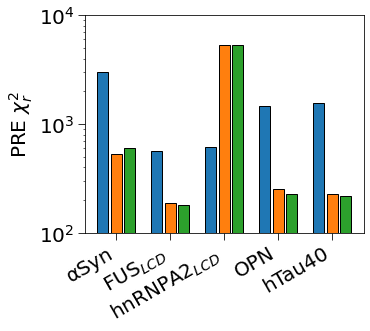

In [34]:
chi2_vs_protein_original = []
chi2_vs_protein_PW = []
chi2_vs_protein_PP = []

xaxis_labels = []

for protein in PRE_proteins:
      
    if protein in ['OPN', 'htau40']:
        pkl_file_PP = f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PPrescaling/IDPs_PRE/Production_run/PP/chi2_{protein}_tc.pkl'
        pkl_file_PW = f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PPrescaling/IDPs_PRE/Production_run/PW/chi2_{protein}_tc.pkl'
        
        PRE_results_PP = load_pickle5(pkl_file_PP)
        PRE_results_PW = load_pickle5(pkl_file_PW)
        
        chi2_original = PRE_results_PW[1.00][4.0]
        chi2_PP = PRE_results_PP[0.88][4.0]
        chi2_PW = PRE_results_PW[1.10][4.0]
    
    else:
        pkl_file_PP = f'{data_dir}/PREs/IDPs/PP/All_frames/Tauc_4ns/{protein}_PREs.pkl'
        pkl_file_PW = f'{data_dir}/PREs/IDPs/PW/Tauc_4ns/{protein}_PREs.pkl'
        
        PRE_results_PP = load_pickle5(pkl_file_PP)
        PRE_results_PW = load_pickle5(pkl_file_PW)

        chi2_original = PRE_results_PP[1.00]['chi2']
        chi2_PP = PRE_results_PP[float(lambda_PP)]['chi2']
        chi2_PW = PRE_results_PW[float(lambda_PW)]['chi2']
    
    chi2_vs_protein_original.append(chi2_original)
    chi2_vs_protein_PW.append(chi2_PW)
    chi2_vs_protein_PP.append(chi2_PP)
    
    xaxis_labels.append(PRE_proteins_plotnames[protein])

#print(f'$\chi^2_r$ original: {np.average(chi2_vs_protein_original):.1f} ± {(np.std(chi2_vs_protein_original)/np.sqrt(len(chi2_vs_protein_original))):.1f}, chi2_PW: {np.average(chi2_vs_protein_PW):.2f} +- {np.std(chi2_vs_protein_PW)/np.sqrt(len(chi2_vs_protein_PW))}, chi2_PP: {np.average(chi2_vs_protein_PP)} +- {np.std(chi2_vs_protein_PP)/np.sqrt(len(chi2_vs_protein_PP))}')
    
xaxismid = np.arange(1,len(PRE_proteins)+1,1)
xaxis1 = xaxismid-0.25
xaxis2 = xaxismid
xaxis3 = xaxismid+0.25

fig = plt.figure(figsize=(len(PRE_proteins), 4))

plt.bar(xaxis1, chi2_vs_protein_original, width=0.2, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_vs_protein_PW, width=0.2, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PW}')
plt.bar(xaxis3, chi2_vs_protein_PP, width=0.2, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.semilogy()
plt.yticks([10**2, 10**3, 10**4])
plt.ylabel('PRE $\chi^2_r$', fontsize=20)
#plt.legend(fontsize=20, loc='upper left')

fig.savefig(f'figures/PREchi2_tauc4ns.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/PREchi2_tauc4ns.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein backbone-water

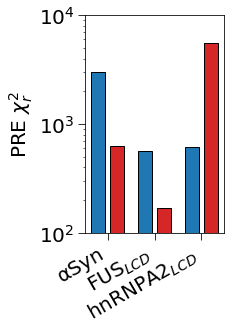

In [49]:
colors_pltdefault = plt.rcParams['axes.prop_cycle'].by_key()['color']

chi2_vs_protein_original = []
chi2_vs_protein_PWBB = []

xaxis_labels = []

for protein in PRE_proteins_PWBB:
    pkl_file_PWBB = f'{data_dir}/PREs/IDPs/PW_BB/All_frames/Tauc_4ns/{protein}_PREs.pkl'
    pkl_file_PP = f'{data_dir}/PREs/IDPs/PP/All_frames/Tauc_4ns/{protein}_PREs.pkl'
    
    PRE_results_PWBB = load_pickle5(pkl_file_PWBB)
    PRE_results_PP = load_pickle5(pkl_file_PP)
    
    chi2_original = PRE_results_PP[1.00]['chi2']
    chi2_PWBB = PRE_results_PWBB[float(lambda_PWBB)]['chi2']
        
    chi2_vs_protein_original.append(chi2_original)
    chi2_vs_protein_PWBB.append(chi2_PWBB)
    
    xaxis_labels.append(PRE_proteins_plotnames[protein])
    
xaxismid = np.arange(1,len(PRE_proteins_PWBB)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2


fig = plt.figure(figsize=(len(PRE_proteins_PWBB)-0.5, 4))

plt.bar(xaxis1, chi2_vs_protein_original, width=0.3, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_vs_protein_PWBB, width=0.3, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PWBB}', color=colors_pltdefault[3])

plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.semilogy()
plt.yticks([10**2, 10**3, 10**4])

plt.ylabel('PRE $\chi^2_r$', fontsize=20)
#plt.legend(fontsize=20, loc='upper left')

fig.savefig(f'figures/PREchi2_PWBB_tauc4ns.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/PREchi2_PWBB_tauc4ns.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

# 2X FUS PREs

In [37]:
pkl_file_PP = '/storage1/thomasen/MARTINI_rescaling/MARTINI_PPrescaling/IDPs_PRE/Production_run/PP/2x_FUS/FUS_PREs.pkl'
PRE_results_PP = load_pickle5(pkl_file_PP)
pkl_file_PW = '/storage1/thomasen/MARTINI_rescaling/MARTINI_PPrescaling/IDPs_PRE/Production_run/PW/2xFUS_PREs_tc_opt.pkl'
PRE_results_PW = load_pickle5(pkl_file_PW)

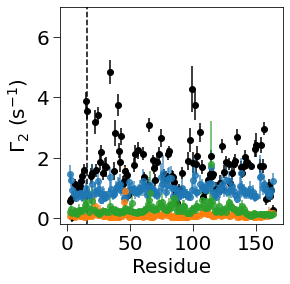

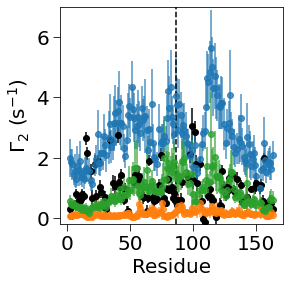

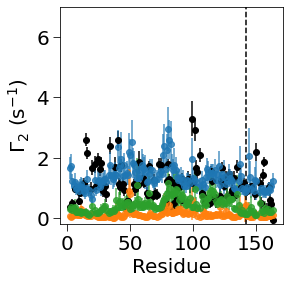

In [55]:
for label in PRE_results_PP['0.88']['expPREs']['value'].keys():
    
    fig = plt.figure(figsize=(4,4))
    
    PREs_exp = PRE_results_PW['1.00']['expPREs']['value'][label]
    PREs_err = PRE_results_PW['1.00']['expPREs']['error'][label]
    
    PREs_calc_un = PRE_results_PW['1.00']['calcPREs']['value'][label]
    PREs_calc_err_un = PRE_results_PW['1.00']['calcPREs']['error'][label]

    PREs_calc_PW = PRE_results_PW['1.10']['calcPREs']['value'][label]
    PREs_calc_err_PW = PRE_results_PW['1.10']['calcPREs']['error'][label]

    PREs_calc_PP = PRE_results_PP['0.88']['calcPREs']['value'][label]
    PREs_calc_err_PP = PRE_results_PP['0.88']['calcPREs']['error'][label]
    
    resis=np.arange(1,len(PREs_exp)+1)
    
    plt.errorbar(resis, PREs_exp, yerr=PREs_err, fmt='o', color='black')
    plt.errorbar(resis, PREs_calc_un, yerr=PREs_calc_err_un, fmt='o', alpha=0.8)
    plt.errorbar(resis, PREs_calc_PW, yerr=PREs_calc_err_PW, fmt='o', alpha=0.8)
    plt.errorbar(resis, PREs_calc_PP, yerr=PREs_calc_err_PP, fmt='o', alpha=0.8)
    
    plt.axvline(label, ls='--', color='black')
    
    plt.ylim(-0.2, 7.0)
    
    plt.tick_params(color='black', direction='out', length=7, labelsize=20)
    plt.xlabel('Residue', fontsize=20)
    plt.ylabel('$Γ_2$ (s$^{-1}$)', fontsize=20)
    
    plt.xticks(np.arange(0, len(resis), 50))
    
    fig.savefig(f'figures/PREs_2xFUS_label{label}.png', bbox_inches='tight', pad_inches=1, dpi=400)
    fig.savefig(f'figures/PREs_2xFUS_label{label}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

53.68217609551323 35.77008973640967 25.71325458237341


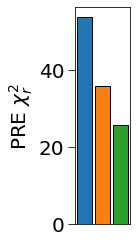

In [51]:
chi2_un = PRE_results_PW['1.00']['chi2']
chi2_PW = PRE_results_PW['1.10']['chi2']
chi2_PP = PRE_results_PP['0.88']['chi2']

print(chi2_un, chi2_PW, chi2_PP)

xaxismid = 1
xaxis1 = xaxismid-0.25
xaxis2 = xaxismid
xaxis3 = xaxismid+0.25

fig = plt.figure(figsize=(1, 4))

plt.bar(xaxis1, chi2_un, width=0.2, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_PW, width=0.2, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PW}')
plt.bar(xaxis3, chi2_PP, width=0.2, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

#plt.semilogy()
plt.xticks([], fontsize=20, ha='right')
plt.tick_params(color='black', direction='out', length=7, labelsize=20)
#plt.yticks([10**1, 10**2])

plt.ylabel('PRE $\chi^2_r$', fontsize=20)
#plt.legend(fontsize=20, loc='upper left')

fig.savefig(f'figures/PREchi2_2xFUS.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/PREchi2_2xFUS.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

In [42]:
PRE_results_PP['0.88']

calcPREs                value                         erro...
chi2                                                25.713255
expPREs                 value                         erro...
tau_c                                                     9.0
Name: 0.88, dtype: object

In [44]:
PRE_results_PW['1.00']

chi2                                                53.682176
tau_c                                                     1.0
expPREs                 value                         erro...
calcPREs                value                         erro...
Name: 1.00, dtype: object

In [46]:
PRE_results_PW['1.10']

chi2                                                 35.77009
tau_c                                                     8.0
expPREs                 value                         erro...
calcPREs                value                         erro...
Name: 1.10, dtype: object

# Select frame based on average Rg

## IDPs

In [46]:
protein='K25'

Rg_original = np.genfromtxt(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/lambda_1.00/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_original = np.average(Rg_original)
MSE_Rg_original = np.square(Rg_original-average_Rg_original)
frame_index_original = np.argmin(MSE_Rg_original)

Rg_PW = np.genfromtxt(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/lambda_{lambda_PW}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_PW = np.average(Rg_PW)
MSE_Rg_PW = np.square(Rg_PW-average_Rg_PW)
frame_index_PW = np.argmin(MSE_Rg_PW)

Rg_PP = np.genfromtxt(ff'{data_dir}/IDPs/PP/{protein}/lambda_{lambda_PP}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_PP = np.average(Rg_PP)
MSE_Rg_PP = np.square(Rg_PP-average_Rg_PP)
frame_index_PP = np.argmin(MSE_Rg_PP)

traj_original = md.load(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/lambda_1.00/prodrun_nopbc.xtc', top=f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/PRO_CG.gro')
traj_PW = md.load(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/lambda_{lambda_PW}/prodrun_nopbc.xtc', top=f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/PRO_CG.gro')
traj_PP = md.load(ff'{data_dir}/IDPs/PP/{protein}/lambda_{lambda_PP}/prodrun_nopbc.xtc', top=ff'{data_dir}/IDPs/PP/{protein}/PRO_CG.gro')

frame_original = traj_original[frame_index_original]
frame_PW = traj_PW[frame_index_PW]
frame_PP = traj_PP[frame_index_PP]

frame_original.save_pdb(f'rep_frames/{protein}_frame_avgRg_original.pdb')
frame_PW.save_pdb(f'rep_frames/{protein}_frame_avgRg_PW.pdb')
frame_PP.save_pdb(f'rep_frames/{protein}_frame_avgRg_PP.pdb')

/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (ALA, MET)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (GLU, ALA)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (PRO, GLU)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consec

## Multidomain

In [47]:
protein='TIA1'

Rg_original = np.genfromtxt(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/lambda_1.00/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_original = np.average(Rg_original)
MSE_Rg_original = np.square(Rg_original-average_Rg_original)
frame_index_original = np.argmin(MSE_Rg_original)

Rg_PW = np.genfromtxt(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/lambda_{lambda_PW}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_PW = np.average(Rg_PW)
MSE_Rg_PW = np.square(Rg_PW-average_Rg_PW)
frame_index_PW = np.argmin(MSE_Rg_PW)

Rg_PP = np.genfromtxt(ff'{data_dir}/MPs/PP/{protein}/lambda_{lambda_PP}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_PP = np.average(Rg_PP)
MSE_Rg_PP = np.square(Rg_PP-average_Rg_PP)
frame_index_PP = np.argmin(MSE_Rg_PP)

traj_original = md.load(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/lambda_1.00/prodrun_nopbc.xtc', top=f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/PRO_CG.gro')
traj_PW = md.load(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/lambda_{lambda_PW}/prodrun_nopbc.xtc', top=f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/PRO_CG.gro')
traj_PP = md.load(ff'{data_dir}/MPs/PP/{protein}/lambda_{lambda_PP}/prodrun_nopbc.xtc', top=ff'{data_dir}/MPs/PP/{protein}/PRO_CG.gro')

frame_original = traj_original[frame_index_original]
frame_PW = traj_PW[frame_index_PW]
frame_PP = traj_PP[frame_index_PP]

frame_original.save_pdb(f'rep_frames/{protein}_frame_avgRg_original.pdb')
frame_PW.save_pdb(f'rep_frames/{protein}_frame_avgRg_PW.pdb')
frame_PP.save_pdb(f'rep_frames/{protein}_frame_avgRg_PP.pdb')

/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (MET, GLU)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (PRO, MET)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (LEU, THR)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consec

# SAXS chi2 scan

## Protein-protein 

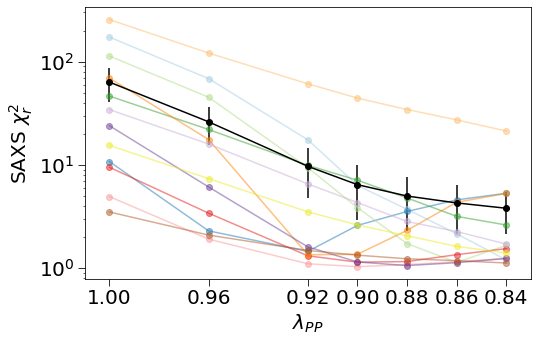

In [162]:
#IDPs
SAXS_chi2_pkl = f'{data_dir}/IDPs/PP/martini3saxs_IDP_PP.pkl'
SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

SAXS_chi2_IDPs = SAXS_chi2

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.xlim(np.amax(SAXS_chi2.index.astype(float)+0.01), np.amin(SAXS_chi2.index.astype(float))-0.01)
plt.xticks(SAXS_chi2.index.astype(float))

plt.errorbar(SAXS_chi2.index.astype(float), SAXS_chi2.mean(axis=1), yerr=SAXS_chi2.sem(axis=1), fmt='-o', c='black')

for i,protein in enumerate(IDPs):
    plt.plot(SAXS_chi2.index.astype(float),SAXS_chi2[protein], '-o', alpha=0.5, c=colors_IDPs[i])
    
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PP}$', fontsize=20)
ylim_IDPs = plt.ylim()

fig.savefig(f'figures/lambda_scan_SAXSchi2_IDPs_PP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_IDPs_PP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)


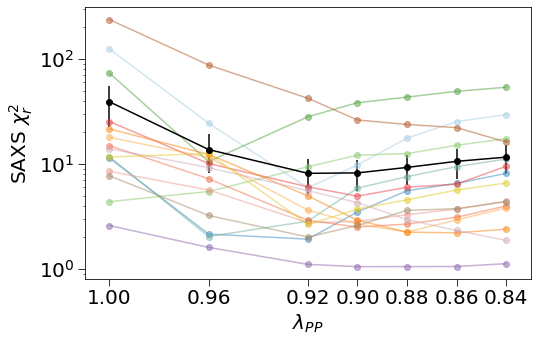

In [163]:
#Multidomain
SAXS_chi2_pkl = f'{data_dir}/MPs/PP/martini3saxs_MP_PP.pkl'
SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

SAXS_chi2_multidomain = SAXS_chi2

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.errorbar(SAXS_chi2.index.astype(float), SAXS_chi2.mean(axis=1), yerr=SAXS_chi2.sem(axis=1), fmt='-o', c='black')

for i,protein in enumerate(multidomain_alt):
    plt.plot(SAXS_chi2.index.astype(float), SAXS_chi2[protein], '-o', alpha=0.5, c=colors_multidomain[i])

plt.xlim(np.amax(SAXS_chi2.index.astype(float)+0.01), np.amin(SAXS_chi2.index.astype(float))-0.01)
plt.xticks(SAXS_chi2.index.astype(float))
    
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PP}$', fontsize=20)
ylim_multidomain = plt.ylim()

fig.savefig(f'figures/lambda_scan_SAXSchi2_multidomain_PP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_multidomain_PP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

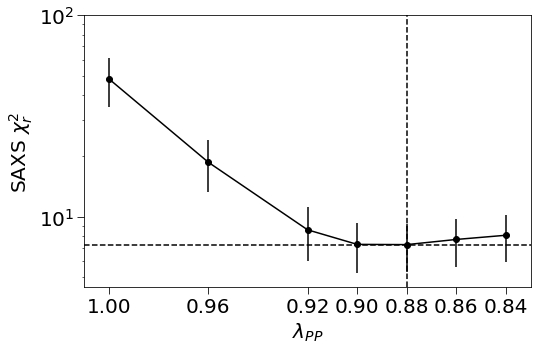

In [164]:
SAXS_chi2_all = pd.merge(SAXS_chi2_IDPs, SAXS_chi2_multidomain, on=np.arange(len(SAXS_chi2_IDPs)))

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.errorbar(SAXS_chi2_IDPs.index.astype(float), SAXS_chi2_all.mean(axis=1), yerr=SAXS_chi2_all.sem(axis=1), fmt='-o', c='black')

plt.axhline(SAXS_chi2_all.mean(axis=1)[4], ls='--', c='black')
plt.axvline(0.88, ls='--', c='black')

plt.xlim(np.amax(SAXS_chi2.index.astype(float)+0.01), np.amin(SAXS_chi2.index.astype(float))-0.01)
plt.xticks(SAXS_chi2.index.astype(float))
plt.yticks([10**1, 10**2])
    
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PP}$', fontsize=20)
plt.ylim(10**0.65, 10**2)
ylim_all = plt.ylim()

fig.savefig(f'figures/lambda_scan_SAXSchi2_all_PP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_all_PP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

In [165]:
print(SAXS_chi2_IDPs.index.astype(float))
print(SAXS_chi2_all.mean(axis=1))

Float64Index([1.0, 0.96, 0.92, 0.9, 0.88, 0.86, 0.84], dtype='float64')
0    48.152702
1    18.594482
2     8.590731
3     7.273137
4     7.253331
5     7.695061
6     8.072977
dtype: float64


## Protein backbone-water

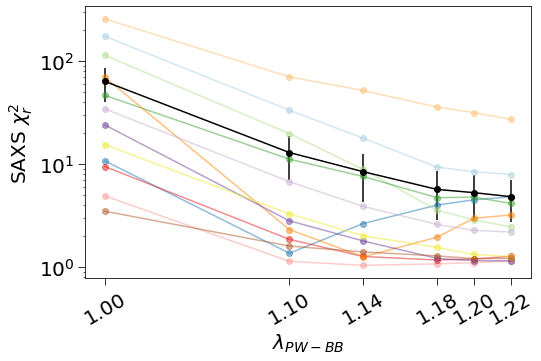

In [166]:
SAXS_chi2_pkl = f'{data_dir}/IDPs/PW_BB/martini3saxs_IDP_PW_BB.pkl'
SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

SAXS_chi2_IDPs = SAXS_chi2

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#plt.xlim(np.amin(SAXS_chi2.index.astype(float))-0.01, np.amax(SAXS_chi2.index.astype(float)+0.01))
plt.xticks(SAXS_chi2.index.astype(float))

plt.errorbar(SAXS_chi2.index.astype(float), SAXS_chi2.mean(axis=1), yerr=SAXS_chi2.sem(axis=1), fmt='-o', c='black')

for i,protein in enumerate(IDPs):
    plt.plot(SAXS_chi2.index.astype(float), SAXS_chi2[protein], '-o', alpha=0.5, c=colors_IDPs[i])
    
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PW-BB}$', fontsize=20)
plt.xticks(rotation=30)
plt.ylim(ylim_IDPs[0], ylim_IDPs[1])

fig.savefig(f'figures/lambda_scan_SAXSchi2_IDPs_PWBB.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_IDPs_PWBB.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

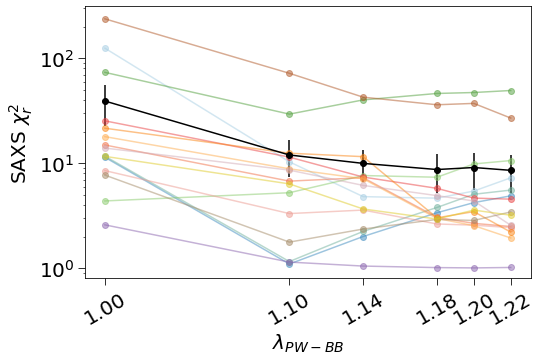

In [167]:
SAXS_chi2_pkl = f'{data_dir}/MPs/PW_BB/martini3saxs_MP_PW_BB.pkl'
SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

SAXS_chi2_multidomain = SAXS_chi2

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.xticks(SAXS_chi2.index.astype(float))

plt.errorbar(SAXS_chi2.index.astype(float), SAXS_chi2.mean(axis=1), yerr=SAXS_chi2.sem(axis=1), fmt='-o', c='black')

for i,protein in enumerate(multidomain_alt):
    plt.plot(SAXS_chi2.index.astype(float), SAXS_chi2[protein], '-o', alpha=0.5, c=colors_multidomain[i])
    
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PW-BB}$', fontsize=20)
plt.xticks(rotation=30)
plt.ylim(ylim_multidomain[0], ylim_multidomain[1])

fig.savefig(f'figures/lambda_scan_SAXSchi2_multidomain_PWBB.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_multidomain_PWBB.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

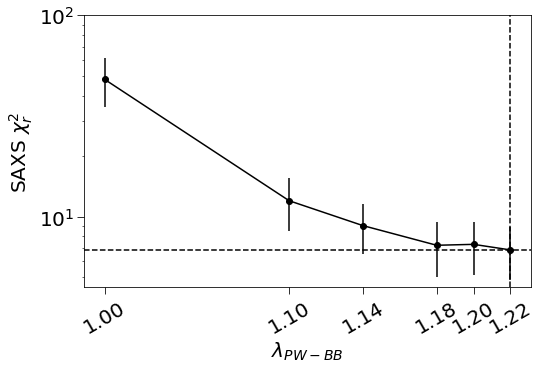

In [168]:
SAXS_chi2_all = pd.merge(SAXS_chi2_IDPs, SAXS_chi2_multidomain, on=np.arange(len(SAXS_chi2_IDPs)))

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.xticks(SAXS_chi2_IDPs.index.astype(float))

plt.errorbar(SAXS_chi2_IDPs.index.astype(float), SAXS_chi2_all.mean(axis=1), yerr=SAXS_chi2_all.sem(axis=1), fmt='-o', c='black')

plt.axhline(SAXS_chi2_all.mean(axis=1)[5], ls='--', c='black')
plt.axvline(1.22, ls='--', c='black')

plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PW-BB}$', fontsize=20)
plt.xticks(rotation=30)
plt.yticks([10**1, 10**2])
plt.ylim(ylim_all[0], ylim_all[1])

fig.savefig(f'figures/lambda_scan_SAXSchi2_all_PWBB.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_all_PWBB.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

In [169]:
print(SAXS_chi2_IDPs.index.astype(float))
print(SAXS_chi2_all.mean(axis=1))

Float64Index([1.0, 1.1, 1.14, 1.18, 1.2, 1.22], dtype='float64')
0    48.152702
1    12.022876
2     9.045530
3     7.223203
4     7.300228
5     6.847456
dtype: float64


## Protein-water

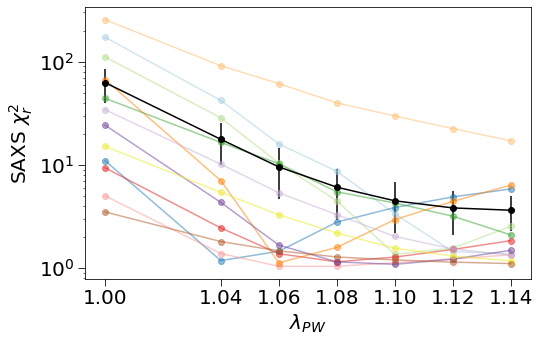

In [170]:
SAXS_chi2_pkl = f'{data_dir}/IDPs/PW/martini3saxs_idp.pkl'
SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

SAXS_chi2_IDPs = SAXS_chi2

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#plt.xlim(np.amin(SAXS_chi2.index.astype(float))-0.01, np.amax(SAXS_chi2.index.astype(float)+0.01))
plt.xticks(SAXS_chi2.index.astype(float))

plt.errorbar(SAXS_chi2.index.astype(float), SAXS_chi2.mean(axis=1), yerr=SAXS_chi2.sem(axis=1), fmt='-o', c='black')

for i,protein in enumerate(IDPs):
    plt.plot(SAXS_chi2.index.astype(float), SAXS_chi2[protein], '-o', alpha=0.5, c=colors_IDPs[i])
    
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PW}$', fontsize=20)
plt.ylim(ylim_IDPs[0], ylim_IDPs[1])

fig.savefig(f'figures/lambda_scan_SAXSchi2_IDPs_PW.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_IDPs_PW.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

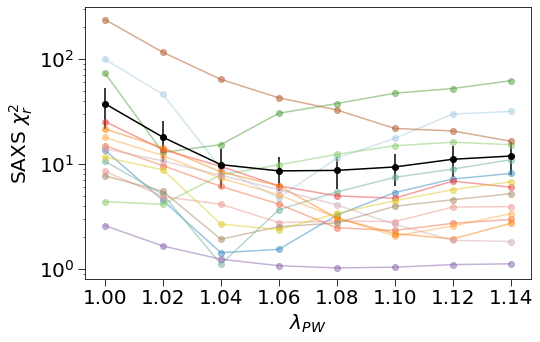

In [171]:
SAXS_chi2_pkl = f'{data_dir}/MPs/PW/martini3saxs_MP_PW.pkl'
SAXS_chi2_pkl_alt = f'{data_dir}/MPs/PW/martini3saxs_md.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)
SAXS_chi2_alt = load_pickle5(SAXS_chi2_pkl_alt)

for protein in SAXS_chi2_alt:
    SAXS_chi2[protein] = SAXS_chi2_alt[protein]

SAXS_chi2_multidomain = SAXS_chi2
    
fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.xticks(SAXS_chi2.index.astype(float))

plt.errorbar(SAXS_chi2.index.astype(float), SAXS_chi2.mean(axis=1), yerr=SAXS_chi2.sem(axis=1), fmt='-o', c='black')

for i,protein in enumerate(multidomain_alt):
    plt.plot(SAXS_chi2.index.astype(float), SAXS_chi2[protein], '-o', alpha=0.5, c=colors_multidomain[i])
    
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PW}$', fontsize=20)
plt.ylim(ylim_multidomain[0], ylim_multidomain[1])
 
fig.savefig(f'figures/lambda_scan_SAXSchi2_multidomain_PW.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_multidomain_PW.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

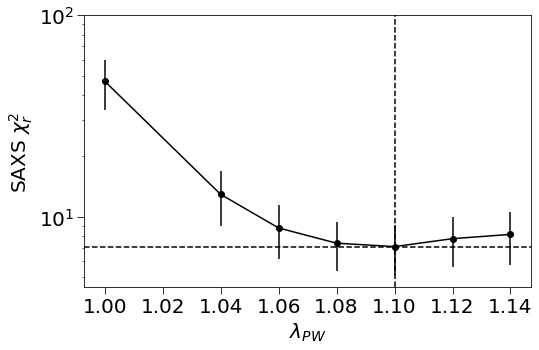

In [172]:
SAXS_chi2_multidomain = SAXS_chi2_multidomain.drop(['1.02'])
SAXS_chi2_all = pd.merge(SAXS_chi2_IDPs, SAXS_chi2_multidomain, on=np.arange(len(SAXS_chi2_IDPs)))

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#plt.xlim(np.amin(SAXS_chi2.index.astype(float))-0.01, np.amax(SAXS_chi2.index.astype(float)+0.01))
plt.xticks(SAXS_chi2.index.astype(float))

plt.errorbar(SAXS_chi2_IDPs.index.astype(float), SAXS_chi2_all.mean(axis=1), yerr=SAXS_chi2_all.sem(axis=1), fmt='-o', c='black')

plt.axhline(SAXS_chi2_all.mean(axis=1)[4], ls='--', c='black')
plt.axvline(1.10, ls='--', c='black')

plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PW}$', fontsize=20)
plt.yticks([10**1, 10**2])
plt.ylim(ylim_all[0], ylim_all[1])

fig.savefig(f'figures/lambda_scan_SAXSchi2_all_PW.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_all_PW.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

In [173]:
print(SAXS_chi2_IDPs.index.astype(float))
print(SAXS_chi2_all.mean(axis=1))

Float64Index([1.0, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14], dtype='float64')
0    47.028786
1    12.890347
2     8.775618
3     7.373094
4     7.090331
5     7.763634
6     8.152797
dtype: float64


# Calpha distances PCA all proteins

## IDPs

JS avg: [[0.         0.68317196 0.69280254 0.6918198 ]
 [0.68317196 0.         0.18674144 0.19688385]
 [0.69280254 0.18674144 0.         0.19552701]
 [0.6918198  0.19688385 0.19552701 0.        ]]
JS sem: [[0.         0.03271385 0.03064631 0.02960708]
 [0.03271385 0.         0.00202542 0.0029231 ]
 [0.03064631 0.00202542 0.         0.00433014]
 [0.02960708 0.0029231  0.00433014 0.        ]]


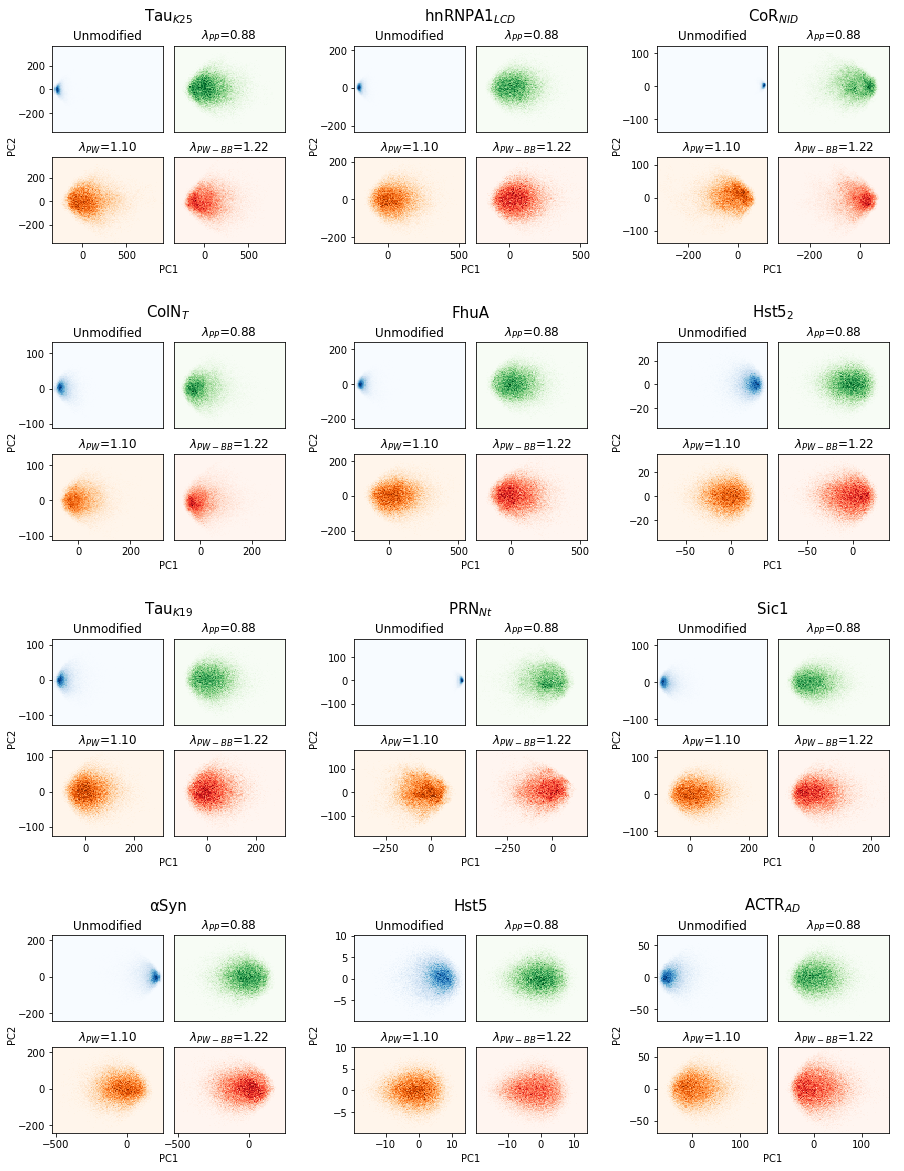

In [20]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15, 20))
outer = gridspec.GridSpec(4, 3, wspace=0.3, hspace=0.5)

js_matrix_vs_protein = []

for i,protein in enumerate(IDPs):
   
    ax = plt.Subplot(fig, outer[i])
    ax.set_title(IDPs_plotnames[protein], pad=25.0, fontsize=15)
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2', labelpad=12.0)
    fig.add_subplot(ax)

    inner = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer[i], wspace=0.1, hspace=0.3)
    
    pca_output = load_pickle(f'PCA_all_proteins/{protein}.pkl')
    pca_ensemble = pca_output[0]
    pca_ensemble1 = pca_ensemble[0:40001]
    pca_ensemble2 = pca_ensemble[40001:80002]
    pca_ensemble3 = pca_ensemble[80002:120003]
    pca_ensemble4 = pca_ensemble[120003:160004]
    pca_ensembles_lst = [pca_ensemble1, pca_ensemble2, pca_ensemble3, pca_ensemble4]

    #Calculate Jensen-Shannon distance matrix
    
    #Find bins over pc1 and pc2 for this protein
    bins_pc1 = np.linspace(np.amin(pca_ensemble[:, 0]), np.amax(pca_ensemble[:, 0]), num=100)
    bins_pc2 = np.linspace(np.amin(pca_ensemble[:, 1]), np.amax(pca_ensemble[:, 1]), num=100)
    bins = [bins_pc1, bins_pc2]
    js_matrix = np.zeros((4,4))
    #Loop over pairs of force fields
    for i in range(4):
        for j in range(4):
            #Make 2d histograms over pc1 and pc2 for the two force fields
            pca_hist_1 = np.histogram2d(pca_ensembles_lst[i][:, 0], pca_ensembles_lst[i][:, 1], density=True, bins=bins)
            pca_hist_2 = np.histogram2d(pca_ensembles_lst[j][:, 0], pca_ensembles_lst[j][:, 1], density=True, bins=bins)
            
            #Flatten histograms
            pca_hist_1_flat = pca_hist_1[0].flatten()
            pca_hist_2_flat = pca_hist_2[0].flatten()
            
            #Calculate js divergence between flattened histograms and put in matrix
            js_div = jensenshannon(pca_hist_1_flat, pca_hist_2_flat)
            js_matrix[i,j] = js_div
    js_matrix_vs_protein.append(js_matrix)
    
    xmin = np.min([*pca_ensemble[:, 0]])
    xmax = np.max([*pca_ensemble[:, 0]])
    ymin = np.min([*pca_ensemble[:, 1]])
    ymax = np.max([*pca_ensemble[:, 1]])
    
    ax = plt.Subplot(fig, inner[0])
    ax.hist2d(pca_ensemble1[:, 0], pca_ensemble1[:, 1], bins=100, range=[[xmin, xmax], [ymin, ymax]], cmap='Blues', label='Unmodified')
    ax.set_title('Unmodified')
    ax.set_xticks([])
    #ax.set_yticks([])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, inner[1])
    ax.hist2d(pca_ensemble2[:, 0], pca_ensemble2[:, 1], bins=100, range=[[xmin, xmax], [ymin, ymax]], cmap='Greens', label='PP')
    ax.set_title('$λ_{{PP}}$=0.88')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, inner[2])
    ax.hist2d(pca_ensemble3[:, 0], pca_ensemble3[:, 1], bins=100, range=[[xmin, xmax], [ymin, ymax]], cmap='Oranges', label='PW')
    ax.set_title('$λ_{{PW}}$=1.10')
    #ax.set_xticks([])
    #ax.set_yticks([])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, inner[3])
    ax.hist2d(pca_ensemble4[:, 0], pca_ensemble4[:, 1], bins=100, range=[[xmin, xmax], [ymin, ymax]], cmap='Reds', label='PWBB')
    ax.set_title('$λ_{{PW-BB}}$=1.22')
    #ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)
    
#fig.show()

fig.savefig(f'figures/Calpha_PCA_IDPs.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Calpha_PCA_IDPs.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

js_matrix_vs_protein = np.array(js_matrix_vs_protein)

js_matrix_avg= np.average(js_matrix_vs_protein, axis=0)
js_matrix_sem = np.std(js_matrix_vs_protein, axis=0)/np.sqrt(len(js_matrix_vs_protein))

print('JS avg:', js_matrix_avg)
print('JS sem:', js_matrix_sem)

## Multidomain

JS avg: [[0.         0.65306436 0.65607114 0.63069768]
 [0.65306436 0.         0.2186444  0.25797355]
 [0.65607114 0.2186444  0.         0.25321941]
 [0.63069768 0.25797355 0.25321941 0.        ]]
JS sem: [[0.         0.03179313 0.03046767 0.03266906]
 [0.03179313 0.         0.00548175 0.014495  ]
 [0.03046767 0.00548175 0.         0.01323927]
 [0.03266906 0.014495   0.01323927 0.        ]]


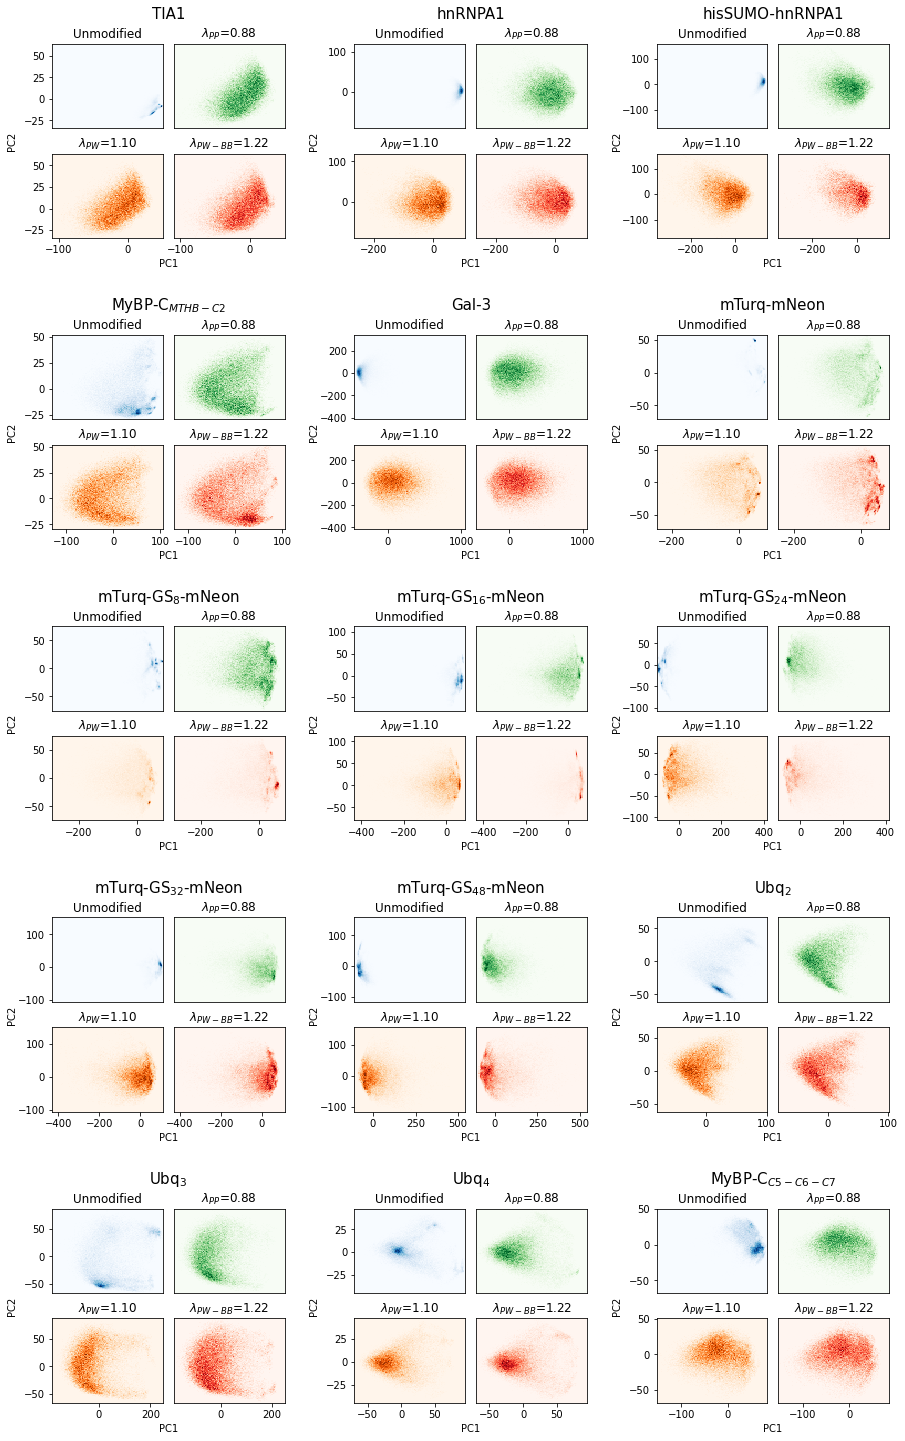

In [18]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15, 25))
outer = gridspec.GridSpec(5, 3, wspace=0.3, hspace=0.5)

js_matrix_vs_protein = []

for i,protein in enumerate(multidomain):
   
    ax = plt.Subplot(fig, outer[i])
    ax.set_title(multidomain_plotnames[protein], pad=25.0, fontsize=15)
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2', labelpad=12.0)
    fig.add_subplot(ax)

    inner = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer[i], wspace=0.1, hspace=0.3)
    
    pca_output = load_pickle(f'PCA_all_proteins/{protein}.pkl')
    pca_ensemble = pca_output[0]
    pca_ensemble1 = pca_ensemble[0:40001]
    pca_ensemble2 = pca_ensemble[40001:80002]
    pca_ensemble3 = pca_ensemble[80002:120003]
    pca_ensemble4 = pca_ensemble[120003:160004]
    pca_ensembles_lst = [pca_ensemble1, pca_ensemble2, pca_ensemble3, pca_ensemble4]
    
    #Calculate Jensen-Shannon distance matrix for pc1
    bins_pc1 = np.linspace(np.amin(pca_ensemble[:, 0]), np.amax(pca_ensemble[:, 0]), num=100)
    bins_pc2 = np.linspace(np.amin(pca_ensemble[:, 1]), np.amax(pca_ensemble[:, 1]), num=100)
    bins = [bins_pc1, bins_pc2]
    js_matrix = np.zeros((4,4))
    for i in range(4):
        for j in range(4):
            pca_hist_1 = np.histogram2d(pca_ensembles_lst[i][:, 0], pca_ensembles_lst[i][:, 1], density=True, bins=bins)
            pca_hist_2 = np.histogram2d(pca_ensembles_lst[j][:, 0], pca_ensembles_lst[j][:, 1], density=True, bins=bins)
        
            pca_hist_1_flat = pca_hist_1[0].flatten()
            pca_hist_2_flat = pca_hist_2[0].flatten()
            
            js_div = jensenshannon(pca_hist_1_flat, pca_hist_2_flat)
            js_matrix[i,j] = js_div
    js_matrix_vs_protein.append(js_matrix)
    
    xmin = np.min([*pca_ensemble[:, 0]])
    xmax = np.max([*pca_ensemble[:, 0]])
    ymin = np.min([*pca_ensemble[:, 1]])
    ymax = np.max([*pca_ensemble[:, 1]])
    
    ax = plt.Subplot(fig, inner[0])
    ax.hist2d(pca_ensemble1[:, 0], pca_ensemble1[:, 1], bins=100, range=[[xmin, xmax], [ymin, ymax]], cmap='Blues', label='Unmodified')
    ax.set_title('Unmodified')
    ax.set_xticks([])
    #ax.set_yticks([])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, inner[1])
    ax.hist2d(pca_ensemble2[:, 0], pca_ensemble2[:, 1], bins=100, range=[[xmin, xmax], [ymin, ymax]], cmap='Greens', label='PP')
    ax.set_title('$λ_{{PP}}$=0.88')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, inner[2])
    ax.hist2d(pca_ensemble3[:, 0], pca_ensemble3[:, 1], bins=100, range=[[xmin, xmax], [ymin, ymax]], cmap='Oranges', label='PW')
    ax.set_title('$λ_{{PW}}$=1.10')
    #ax.set_xticks([])
    #ax.set_yticks([])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, inner[3])
    ax.hist2d(pca_ensemble4[:, 0], pca_ensemble4[:, 1], bins=100, range=[[xmin, xmax], [ymin, ymax]], cmap='Reds', label='PWBB')
    ax.set_title('$λ_{{PW-BB}}$=1.22')
    #ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)
    
#fig.show()

fig.savefig(f'figures/Calpha_PCA_multidomain.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Calpha_PCA_multidomain.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

js_matrix_vs_protein = np.array(js_matrix_vs_protein)

js_matrix_avg= np.average(js_matrix_vs_protein, axis=0)
js_matrix_sem = np.std(js_matrix_vs_protein, axis=0)/np.sqrt(len(js_matrix_vs_protein))

print('JS avg:', js_matrix_avg)
print('JS sem:', js_matrix_sem)


# Encore DRES aSyn and hnRNPA1

## aSyn

In [7]:
DRES_results = load_pickle('aSyn_Carab/DRES_skip10.pkl')
unmodified_results = DRES_results['results'][0]
PP_results = DRES_results['results'][1]
a03ws_results = DRES_results['results'][2]

print(f'Unmodified to a03ws: {unmodified_results[2]:.3f}')
print(f'PP to a03ws: {PP_results[2]:.2f}')
print(f'Unmodified to a99SBdisp: {unmodified_results[3]:.3f}')
print(f'PP to a99SBdisp: {PP_results[3]:.3f}')
print(f'a03ws to a99SBdisp: {a03ws_results[3]:.3f}') 

Unmodified to a03ws: 0.049
PP to a03ws: 0.04
Unmodified to a99SBdisp: 0.065
PP to a99SBdisp: 0.040
a03ws to a99SBdisp: 0.048


## hnRNPA1

In [8]:
DRES_results = load_pickle('hnRNPA1_AllainJeschke/DRES_skip10.pkl')
unmodified_results = DRES_results['results'][0]
PP_results = DRES_results['results'][1]
print(f'Unmodified to ensemble: {unmodified_results[2]:.3f}')
print(f'PP to ensemble: {PP_results[2]:.3f}')


Unmodified to ensemble: 0.087
PP to ensemble: 0.077


In [9]:
print(DRES_results)

{'results': array([[0.        , 0.02978548, 0.08657613],
       [0.02978548, 0.        , 0.07735393],
       [0.08657613, 0.07735393, 0.        ]]), 'details': {'reduced_coordinates': [array([[ -975.00043744,  -127.19671577,  -174.89226993, ...,
         -747.99916073,   131.90658165,   -25.491609  ],
       [  -86.17904807,    71.33412661,   567.93006903, ...,
         -568.25738716,   553.19889876,    -5.55037742],
       [-1218.9194044 ,  -696.35026256,   -62.9841102 , ...,
         2754.6196405 ,   639.3473171 ,   -16.61042494]])], 'dimensionality_reduction_details': {'ensemble_membership': array([1, 1, 1, ..., 3, 3, 3])}}}
